In [1]:
from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 2.2em;
line-height:1.4em;
text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: -0.4em;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.5em;
line-height:1.4em;
padding-left:3em;
padding-right:3em;
}
</style>
""")

# Introduction to Linear/Logistic regressions

## Content


+ Types of learning
+ Empirical risk minimization
+ Linear Regression
+ Least Squares method
+ Polynomial regression
+ Ovefitting
+ L2 regularization
+ L1 regularizatiom
+ Validation
+ Model selection
+ Recap of probability
+ ML
+ MAP
+ Logistic regression

http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_(%D0%BA%D1%83%D1%80%D1%81_%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B9%2C_%D0%9A.%D0%92.%D0%92%D0%BE%D1%80%D0%BE%D0%BD%D1%86%D0%BE%D0%B2)

http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Working%20With%20Markdown%20Cells.html

http://www.machinelearning.ru/wiki/images/7/7e/VetrovSem11_LARS.pdf

http://people.math.sc.edu/girardi/m142/handouts/10sTaylorPolySeries.pdf

http://www.machinelearning.ru/wiki/images/f/fc/Voron-ML-Intro-slides.pdf

http://www.machinelearning.ru/wiki/images/5/53/Voron-ML-Lin-SG.pdf

http://www.machinelearning.ru/wiki/images/4/43/Voron-ML-regress-non-slides.pdf

# Machine learning

![mlvd](images/Data_Science_VD.png)

* ML is a subfield of AI that provides computers with the ability to learn without being explicitly programmed
* *What does learning mean?*
    * We say, that program can learn from data relatively to some class of tasks **T** and loss function $\mathcal{L}$, if quality of solution is increased (relatively to $\mathcal{L}$) when more data is presented to the program

# Type of ML tasks

## Major tasks
* *Supervised learning* - ML task of inferring a function $f: X \rightarrow Y$ from labeled data; each sample is a pair of feature vector and some desired output value $D = \left\{ \left( x_i, y_i \right) \right\}_{i=1, \ldots, n}$
    * categorical - classification
    * continuous - regression
    * ordinal - ordinal regression, ranking
        
* *Unsupervised learning* - ML task of inferring a function to describe hidden structure from unlabeled data $D = \left\{ x_i \right\}_{i=1, \ldots, n}$
    * clustering - split data into several groups    
    * dimensionality reduction - reduce number of features minimizing inforamation loss
    * matrix complition - collaborative filtering, reccomender system
    * semi-supervised learning - when you are given with small set of labeled data and large set of unlabeled

* *Reinforcement learning* - ML task where agent learn optimal behaviour from his actions and response from environment
    * differs from standard supervised learning in that correct input/output pairs are never presented

## Minor tasks
* *Transfer learning* - ML task that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem

* *Active learning* - ML task, often called as optimal experimental design, where model can query environment for new labeled or unlabeled data, goal is to achieve good quality with minimum queries

# Predictive model

*Predictive model* - is a parametric family of functions (hypothesis):

$$\Large \mathcal{H} = \left\{ h\left(x, \theta\right) | \theta \in \Theta \right\}$$

* where
    * $\large h: X \times \Theta \rightarrow Y$    
    * $\large \Theta$ - is a set of parameters

# Learning algorithm

*Learning algorithm* - is a map from dataset to hypothesis set:

$$\Large \mathcal{M}: \left(X \times Y\right)^n \rightarrow \mathcal{H}$$

Ususally there are two steps in supervised learning tasks:
1. Training step, when we train hypothesis: $\large h = \mathcal{M}\left(D\right)$
* Testing step, when for given sample $\large x$ we calculate output $\large \hat{y} = h\left(x\right)$

# Empirical risk minimization
*Empirical risk minimization* - is a principle in statistical learning theory for solving supervised learning tasks including regression and classification.

Lets define real-valued loss function:
$$\Large L: Y \times Y \rightarrow \mathbb{R}$$
which measures how different the prediction $\large \hat {y}$ of a hypothesis is from the true outcome $\large y$.

Then the risk associated with hypothesis $\large h$ is then defined as the expectation of the loss function:
$$\Large \begin{array}{rcl}Q\left(h\right) &=& \text{E}_{x, y \sim P\left(x, y\right)}\left[L\left(h\left(x\right), y\right)\right] \\
&=& \int L\left(h\left(x\right), y\right) d P\left(x, y\right)
\end{array}$$

Unfortunately $\large P\left(x, y\right)$ is unknown to the learning algorithm. But we can compute an approximation, called empirical risk:

$$\Large Q_{\text{emp}}\left(h\right) = \frac{1}{n} \sum_{i=1}^n L\left(h\left(x_i\right), y_i\right)$$

And principle says, that we should choose:
$$\Large \hat{h} = \arg \min_{h \in \mathcal{H}} Q_{\text{emp}}\left(h\right)$$

Common choices for loss-function:
* classification: $\large L\left(\hat{y}, y\right) = \text{I}\left[\hat{y} = y\right]$
* regression: $\large L\left(\hat{y}, y\right) = \left(\hat{y} - y\right)^2$

# Generalization

Main disadvantage of ERM is that it is prone to overfitting.

* We say that model has *generalization ability* if probability of error on test set (unseen data, which is not available during training) is small or at least can be predicted
* *Overfitting* is bad phenomenon when your model is very good on train data, but very bad on test data. Such model doesn't have generalization ability.

# Linear regression

Lets restict set of hypothesis to the set of linear functions of $\large m + 1$ features ($\large x_0 = 1$):
$$\Large \begin{array}{rcl} \forall h \in \mathcal{H}, h\left(\vec{x}\right) &=& w_0 x_0 + w_1 x_1 + w_2 x_2 + \cdots + w_m x_m \\
&=& \sum_{i=0}^m w_i x_i \\
&=& \vec{x}^T \vec{w}
\end{array}$$
where:
* $\large \vec{x} \in \mathbb{R}^{m + 1}$

Optimization goal is to minimize Mean Square Error (MSE):
$$\Large \begin{array}{rcl}\mathcal{L}\left(X, \vec{y}, \vec{w} \right) &=& \frac{1}{2n} \sum_{i=1}^n \left(y_i - \vec{x}_i^T \vec{w}_i\right)^2 \\
&=& \frac{1}{2n} \left\| \vec{y} - X \vec{w} \right\|_2^2 \\
&=& \frac{1}{2n} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right)
\end{array}$$
where:
* $\large \vec{w} \in \mathbb{R}^{m + 1}$
* $\large \vec{y} \in \mathbb{R}^n$
* $\large X$ is $\large n \times m$ matrix, where each row is feature vector

Lets infer learning algorithm, we will use the fact that square function in convex function:
$$\Large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} &=& \frac{\partial}{\partial \vec{w}} \frac{1}{2n} \left( \vec{y}^T \vec{y} -2\vec{y}^T X \vec{w} + \vec{w}^T X^T X \vec{w}\right) \\
&=& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right)
\end{array}$$

Now we can find the solution:
$$\Large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = 0 &\Leftrightarrow& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right) = 0 \\
&\Leftrightarrow& -X^T \vec{y} + X^T X \vec{w} = 0 \\
&\Leftrightarrow& X^T X \vec{w} = X^T \vec{y} \\
&\Leftrightarrow& \vec{w} = \left(X^T X\right)^{-1} X^T \vec{y}
\end{array}$$

Such solution has a lot of good properties, check Gauss–Markov theorem: https://en.wikipedia.org/wiki/Gauss%E2%80%93Markov_theorem

In [2]:
# plot graphics in the notebook 
%matplotlib inline
# support operations for large, multi-dimensional arrays and matrices
import numpy as np
# make experiments reproducible
np.random.seed(12345)
# extension of main plotting library matplotlib
import seaborn as sns
# set style
sns.set_style("dark")
# main library for plotting
import matplotlib.pyplot as plt
# set default size of plots
plt.rcParams['figure.figsize'] = 16, 12

In [3]:
plt.rcParams['figure.figsize'] = 16, 12

In [4]:
def generate_wave_set(n_support=1000, n_train=25, n_test=None, std=0.3):
    data = {}
    # create 1000 points uniformly distibuted in closed intervl from 0 to 2*pi
    # it is some kind of resolution for sampling
    data['support'] = np.linspace(0, 2*np.pi, num=1000)
    # calculate sine values
    data['values'] = np.sin(data['support']) + 1
    # choose n_train random vakues from support (with replacement) and sort them ascending
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # calculate sine for each of samplesd point
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    if n_test is not None:
        data['x_test'] = np.sort(np.random.choice(data['support'], size=n_test, replace=True))
        data['y_test'] = np.sin(data['x_test']) + 1 + np.random.normal(0, std, size=data['x_test'].shape[0])
    return data

Shape of X is (25,)
Head of X is [ 0.48428956  0.57234221  0.66039485  0.74215802  0.81134225  1.30821075
  1.67928977  1.79250031  1.98118456  2.2453425 ]


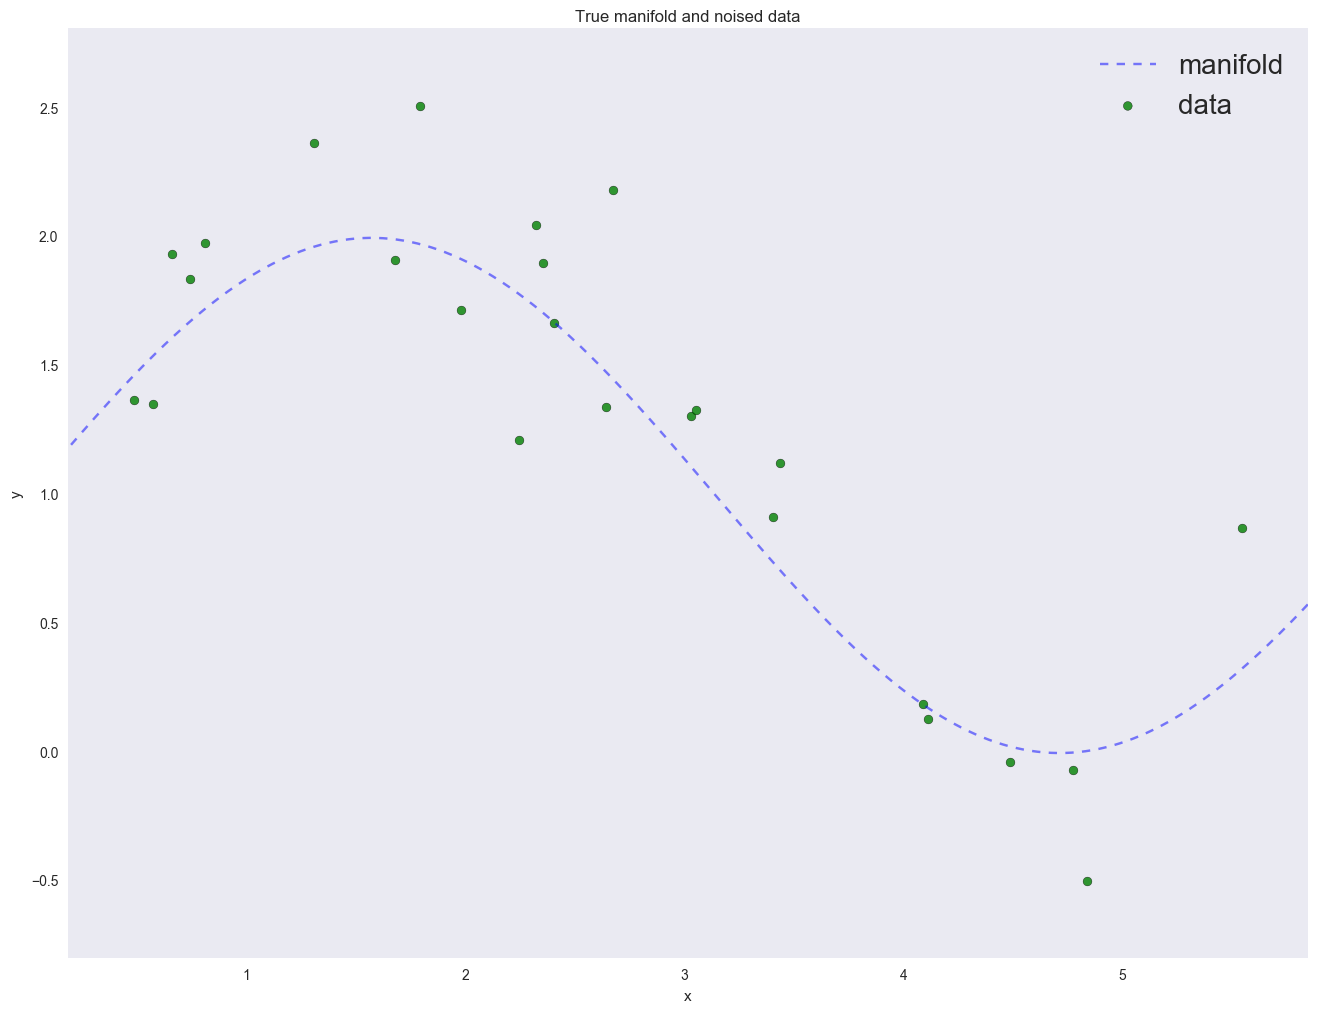

In [5]:
# sample 25 points from 1000 available from noised sin manifold 
data = generate_wave_set(1000, 25)

print 'Shape of X is', data['x_train'].shape
print 'Head of X is', data['x_train'][:10]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('True manifold and noised data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Top rows of X
[[ 1.          0.48428956]
 [ 1.          0.57234221]
 [ 1.          0.66039485]
 [ 1.          0.74215802]
 [ 1.          0.81134225]]
Fitted params
[ 2.42648096 -0.42818065]


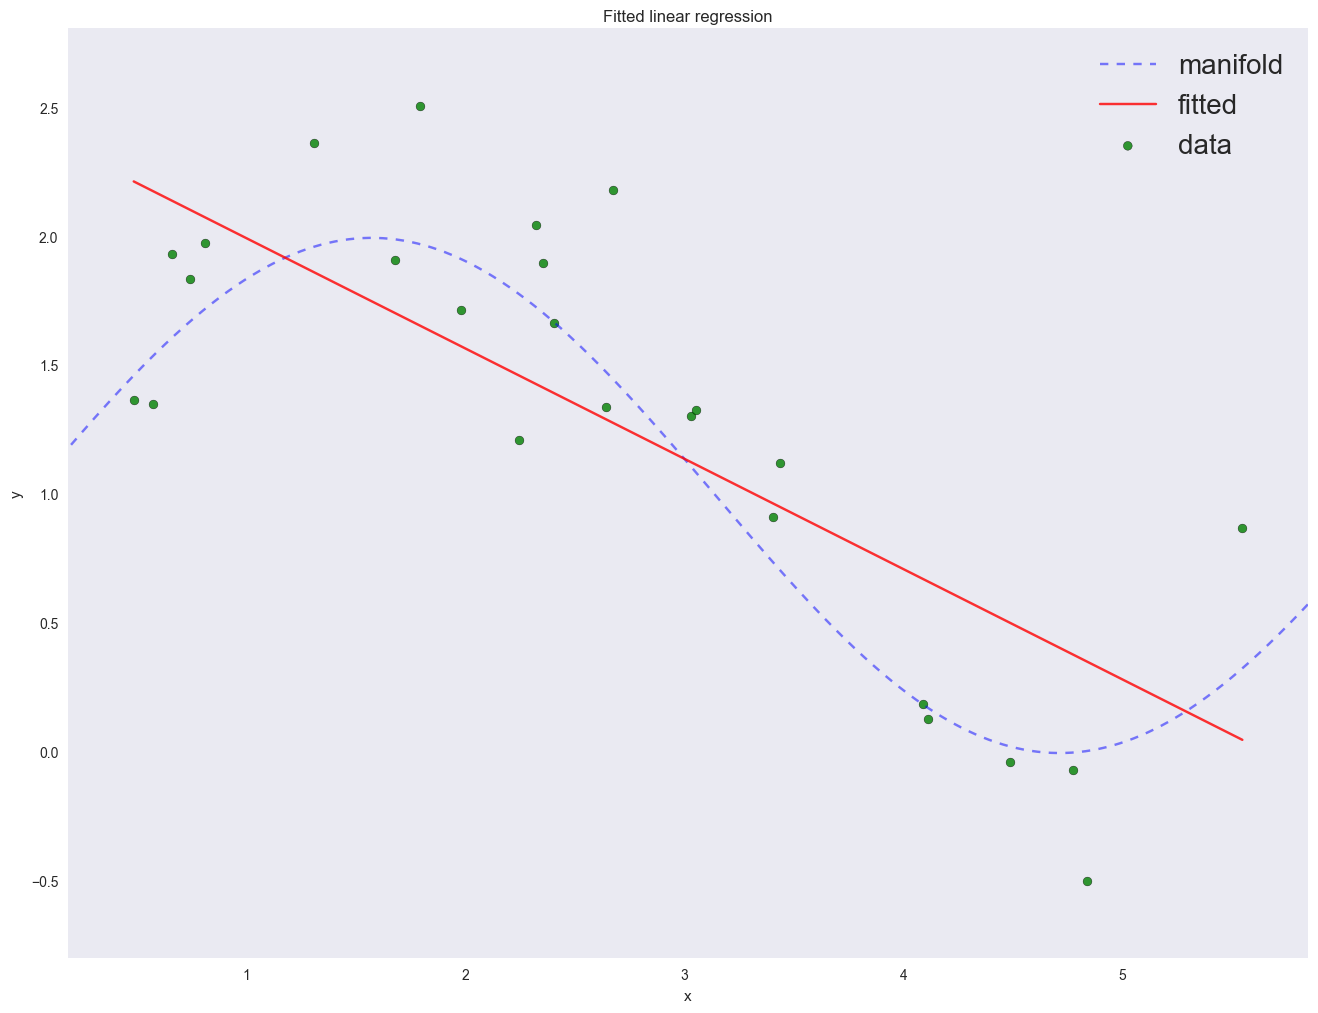

In [6]:
# add column of ones to the first position
X = np.array([np.ones(data['x_train'].shape[0]), data['x_train']]).T
print 'Top rows of X'
print X[:5, :]
# linear algebra magic of numpy
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
print 'Fitted params'
print w
y_hat = np.dot(w, X.T)

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

plt.plot(data['x_train'], y_hat, 'r', alpha=0.8, label='fitted')

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted linear regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Polynomial regression

Lets restrict set of hypothesis such that it would contain all polynomials of degree $\large p$. For number of features $\large m = 1$ hypothesis set is:
$$\Large \begin{array}{rcl} \forall h \in \mathcal{H}, h\left(x\right) &=& w_0 + w_1 x + w_1 x^2 + \cdots + w_n x^p \\
&=& \sum_{i=0}^p w_i x^i
\end{array}$$

Nothing more changes.

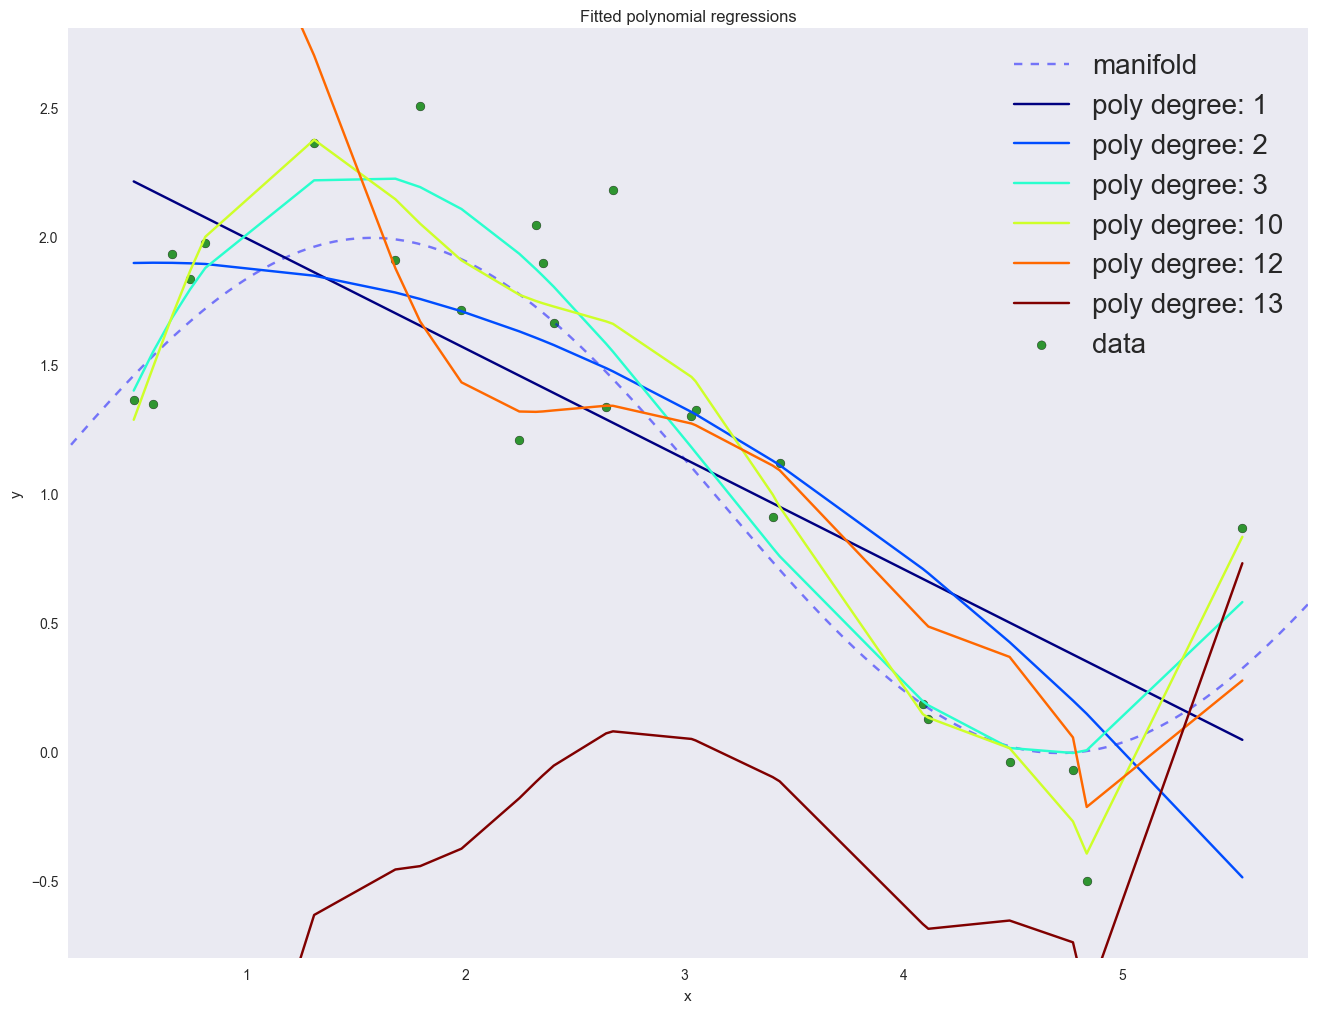

In [7]:
# define list with degrees of polynomials to investigate
degree_list = [1, 2, 3, 10, 12, 13]
# get color palette
cmap = plt.get_cmap('jet')
# compute individual color for each curve
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

# save weights of all fitted polynomial regressions
w_list = []
for ix, degree in enumerate(degree_list):
    # list with polynomial features for each degree
    dlist = [np.ones(data['x_train'].shape[0])] + \
            map(lambda n: data['x_train']**n, range(1, degree + 1))
    X = np.array(dlist).T
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
    w_list.append((degree, w))
    y_hat = np.dot(w, X.T)
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='poly degree: %i' % degree)

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted polynomial regressions')
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

Lets look closer to magnitude of the fitted coefficients (weights).

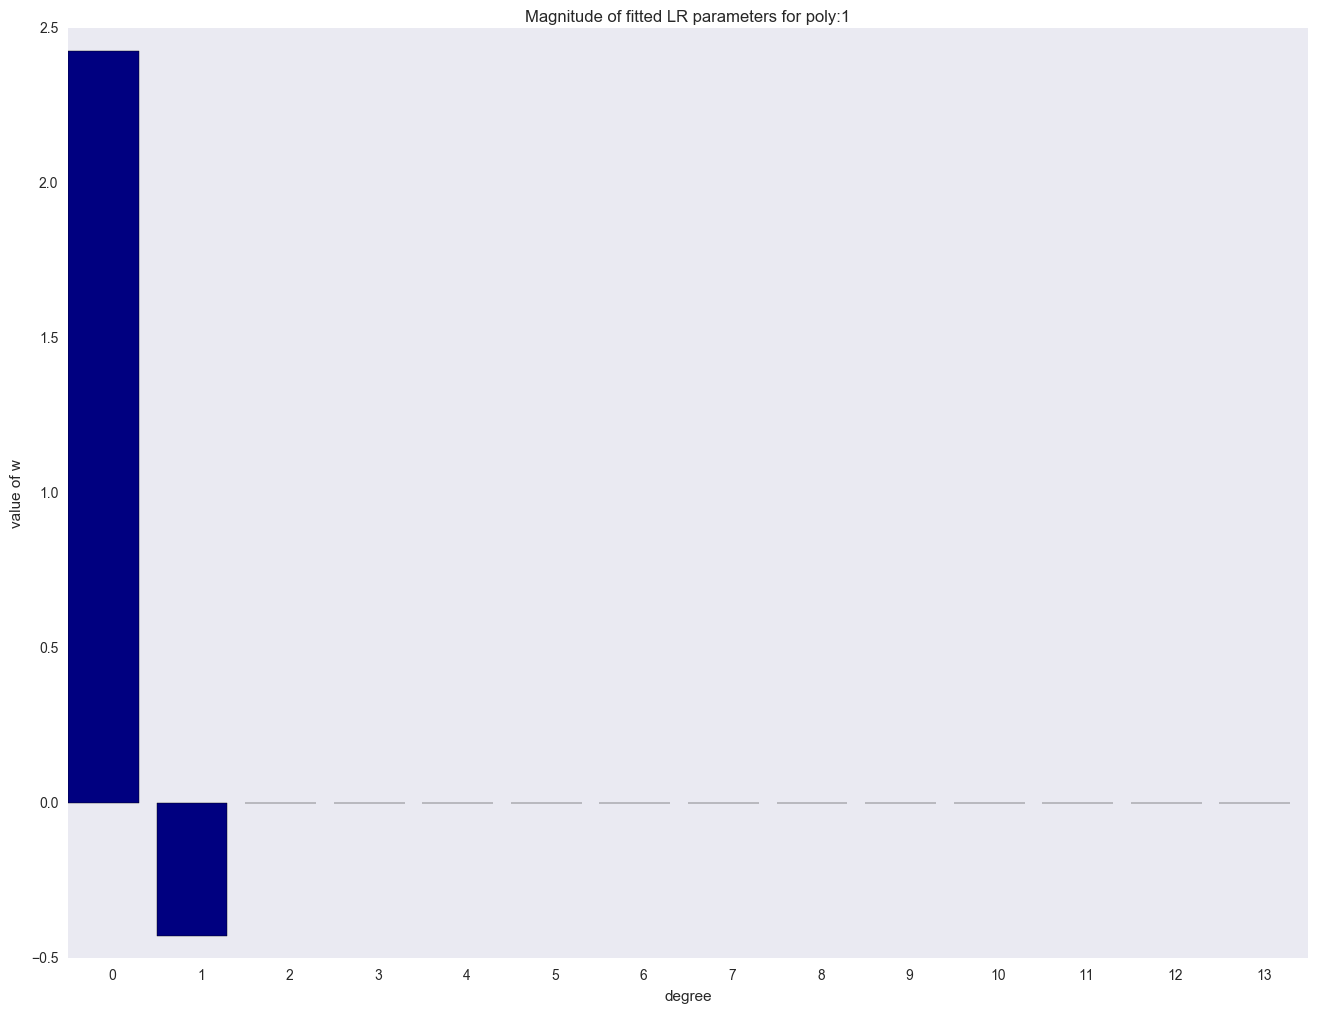

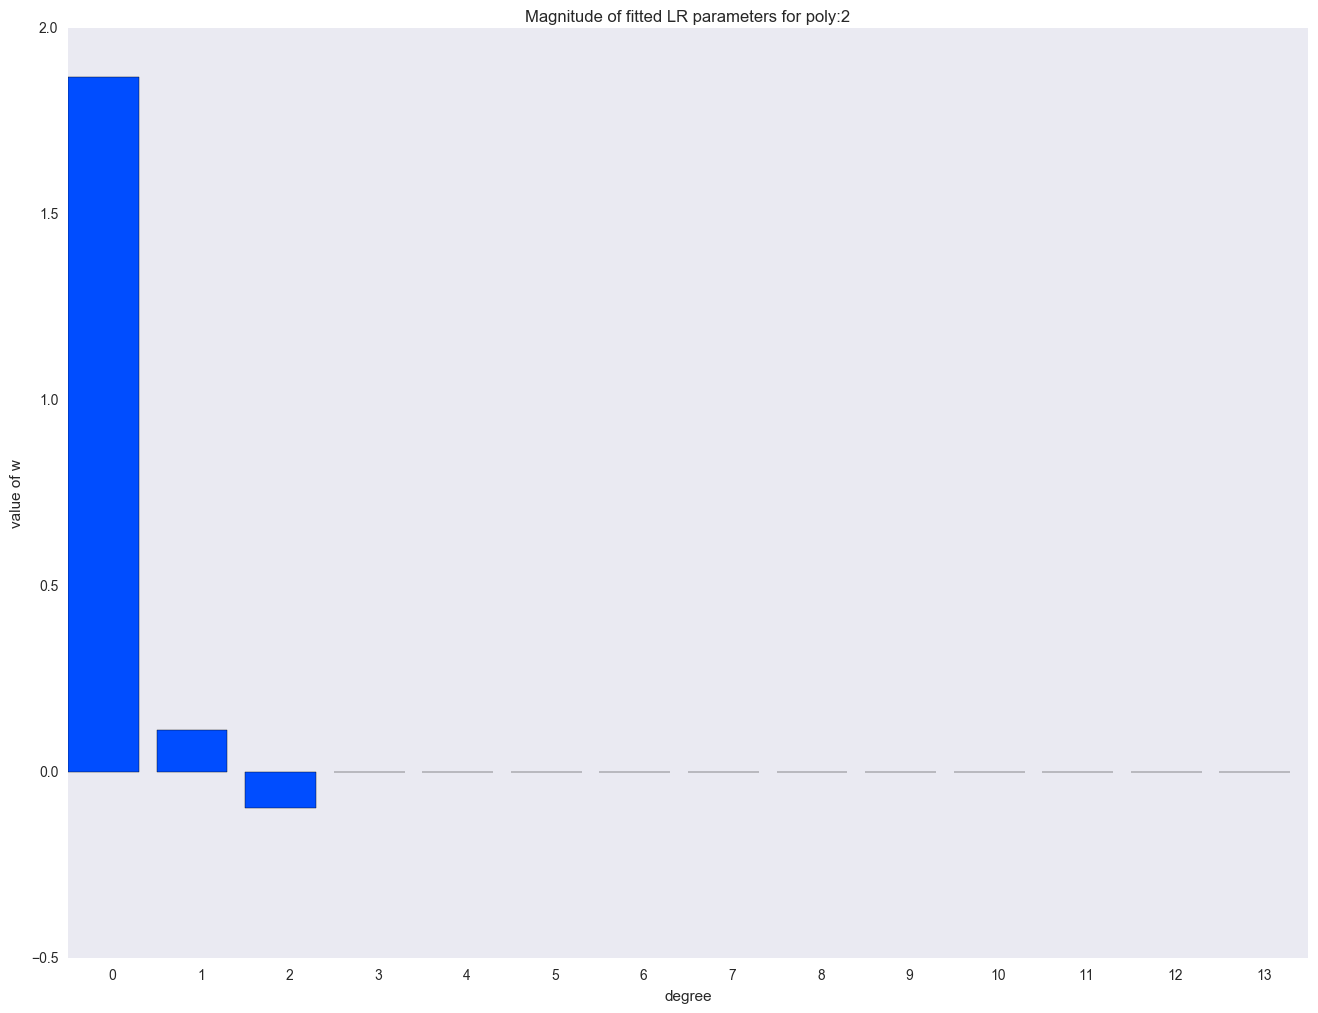

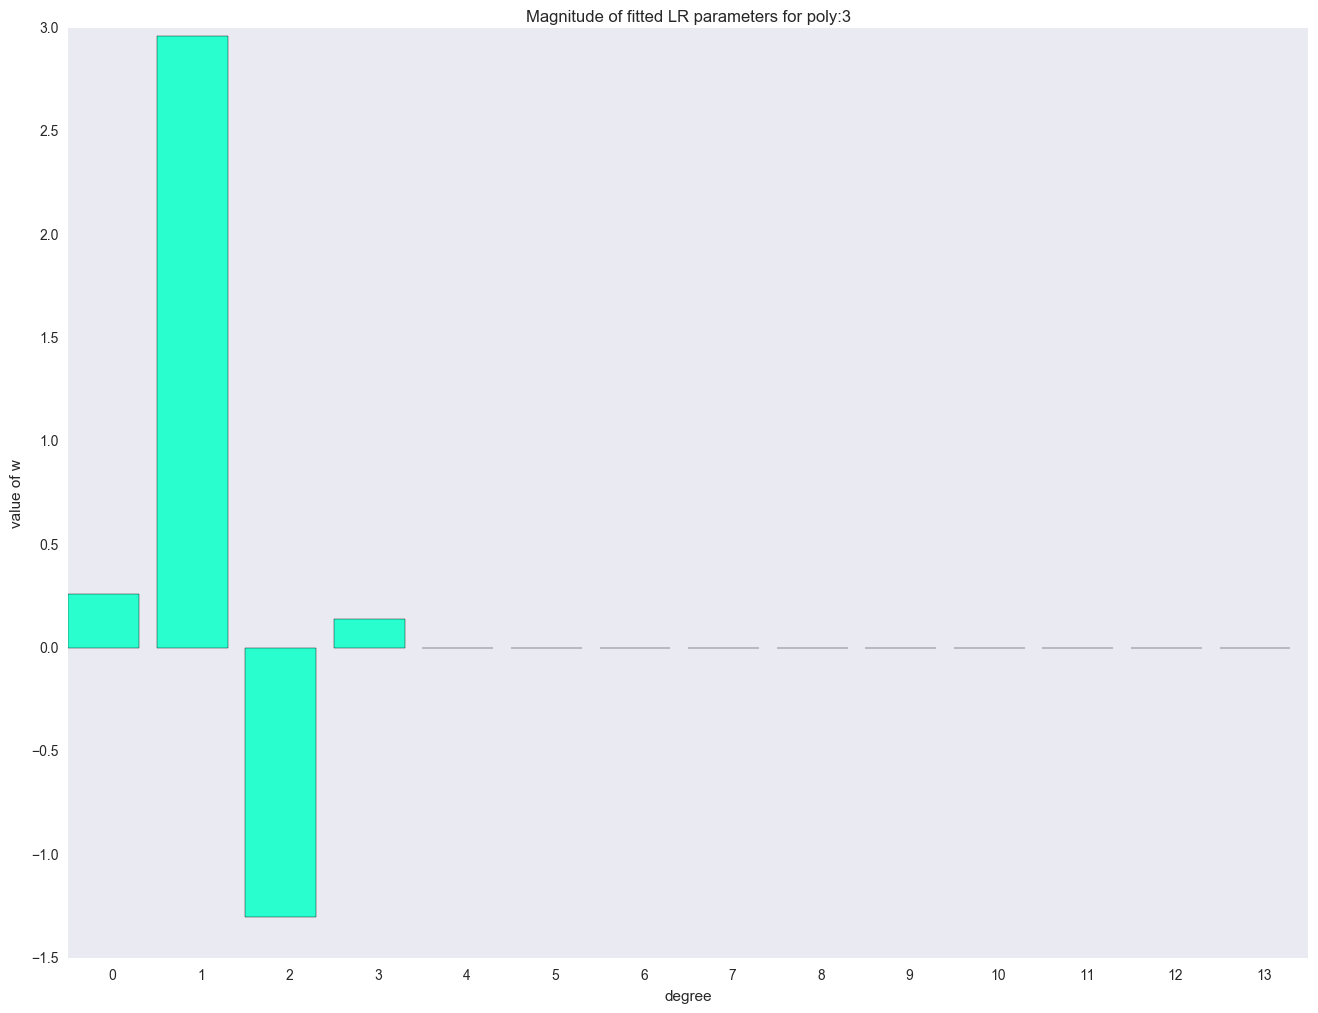

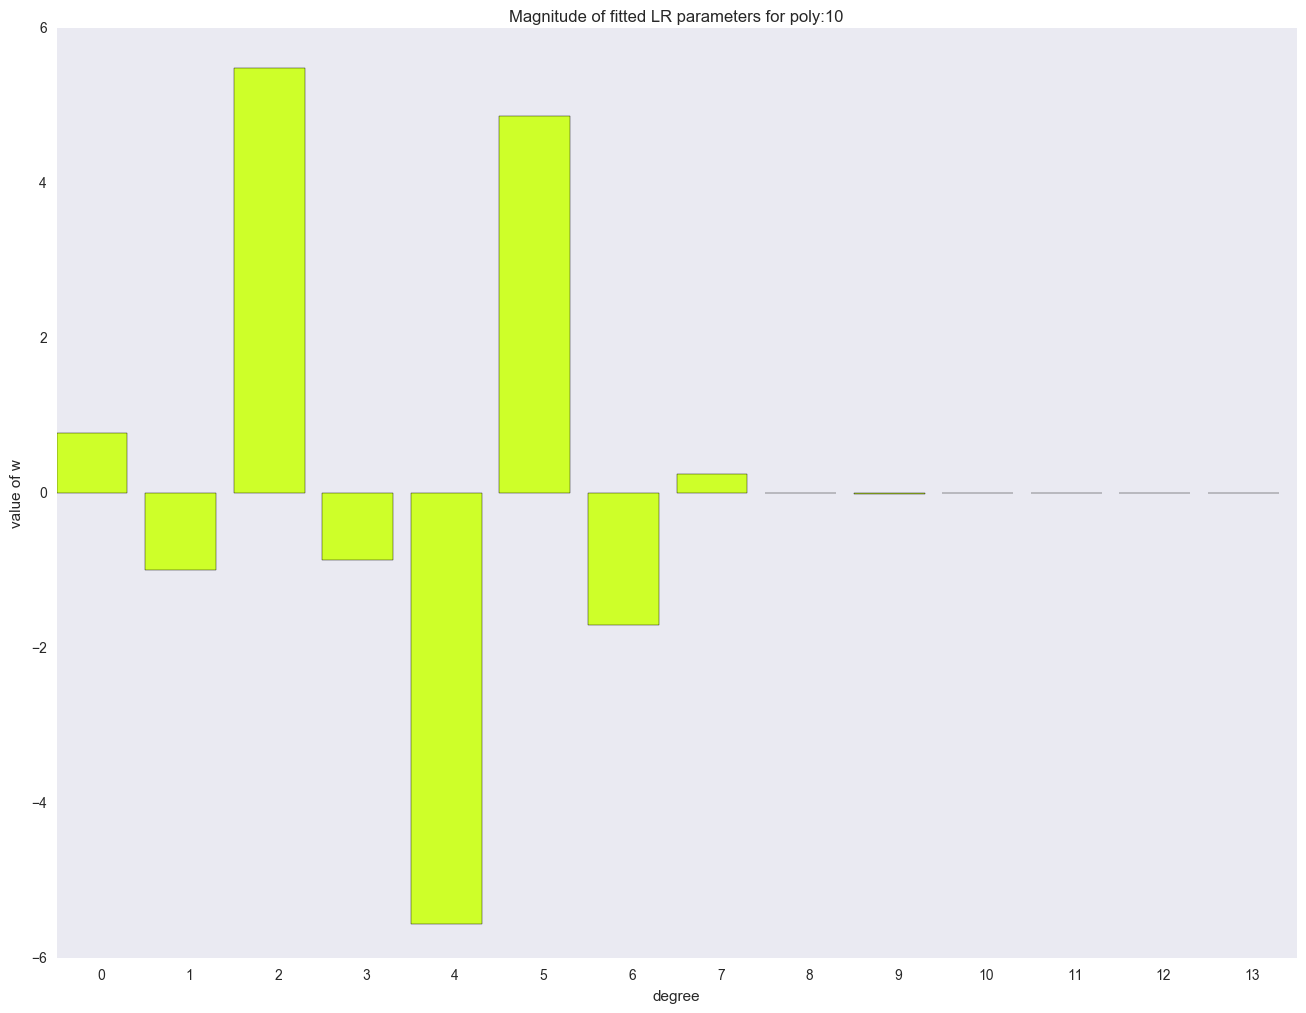

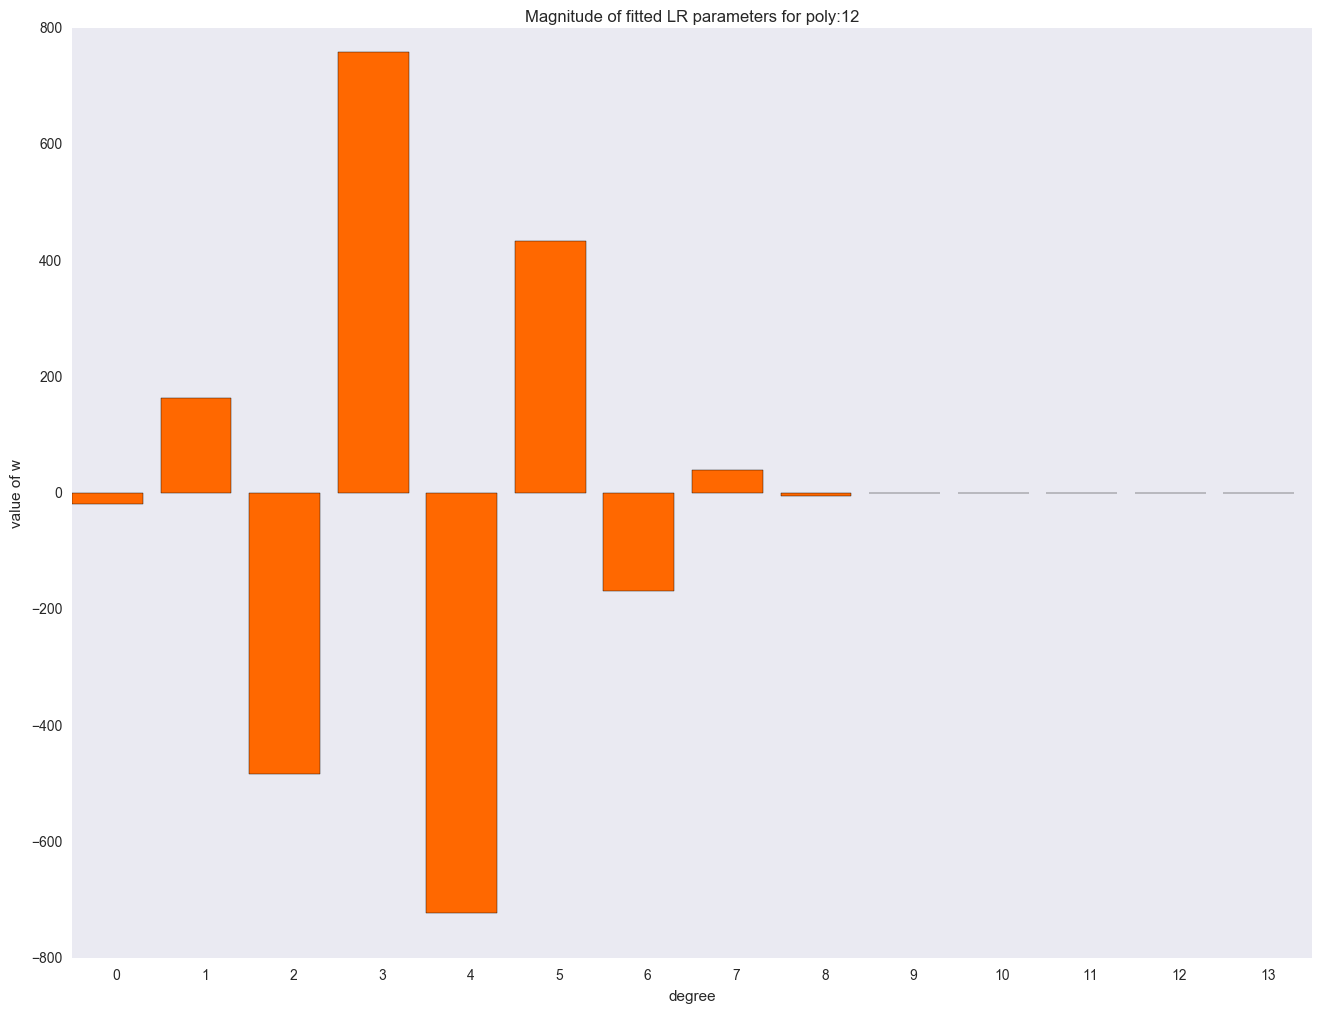

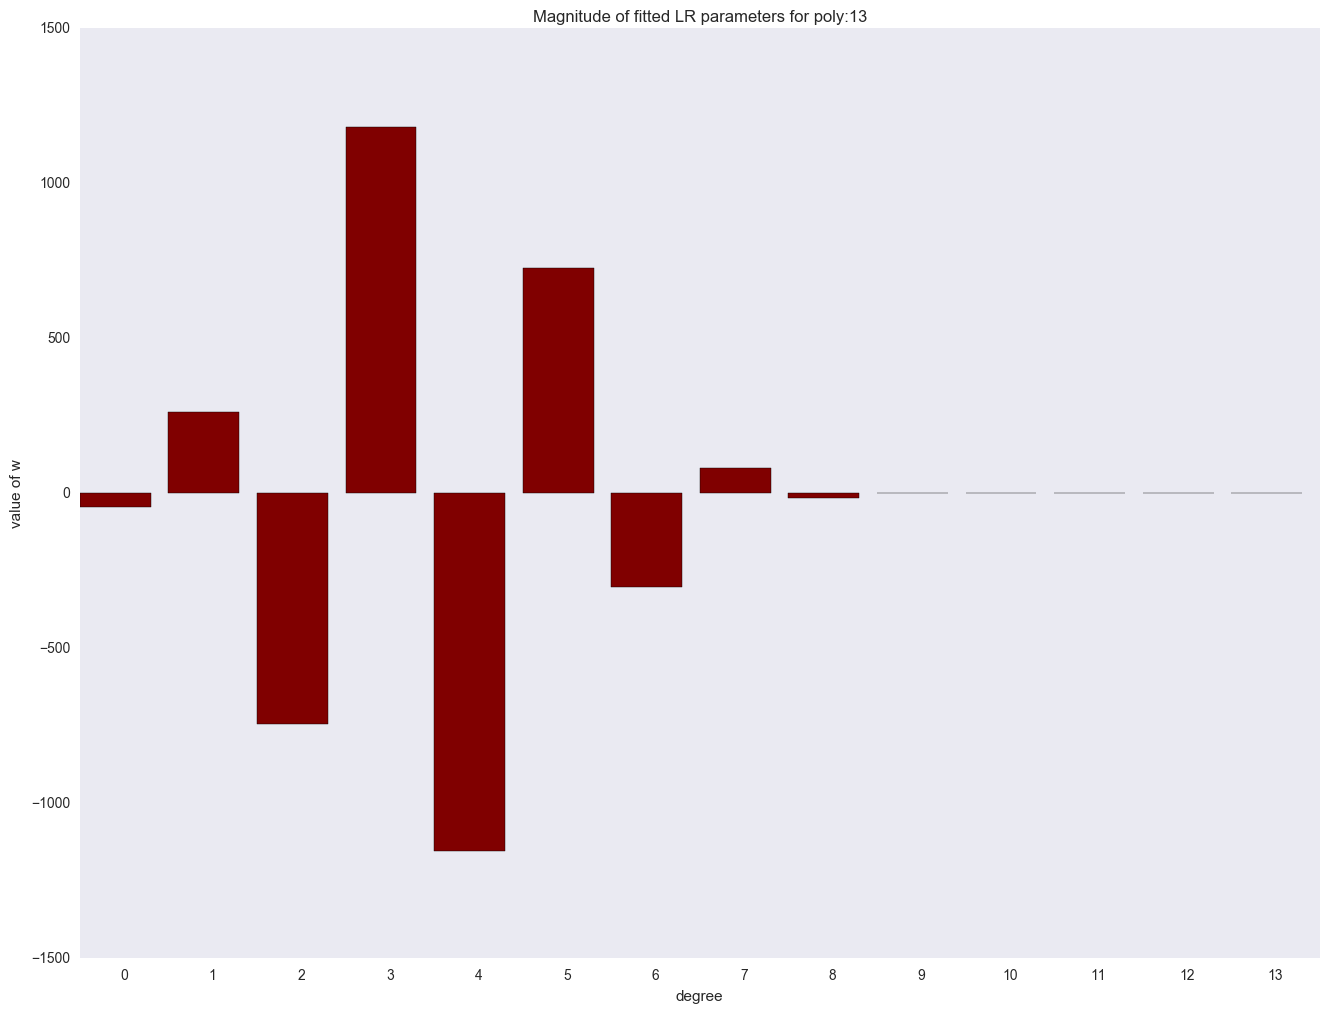

In [8]:
for ix, t in enumerate(w_list):
    degree, w = t
    fig, ax = plt.subplots()
    plt.bar(range(max(degree_list) + 1), np.hstack((w, [0]*(max(degree_list) - w.shape[0] + 1))), color=colors[ix])
    plt.title('Magnitude of fitted LR parameters for poly:%i' % degree)
    plt.xlabel('degree')
    plt.ylabel('value of w')
    ax.set_xticks(np.array(range(max(degree_list) + 1)) + 0.5)
    ax.set_xticklabels(range(max(degree_list) + 1))
    plt.show()

# Regularization

We can see one of the symptoms of overfitting: function try to interpolate data (pass throught each point) and then it finally diverges. We can notice that magnitude of weights is increasing with the degree of polynomial. What about to add some penalty term for big weights? So general case of regularization with penalty term is:
$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right) + \lambda R\left(\vec{w}\right)$$
where:
* $\large \lambda$ is regularization parameter

# L2 regularization

Lets penalty for large L2 norm of the weights vector:
$$\Large R\left(\vec{w}\right) = \frac{1}{2} \left\| \vec{w} \right\|_2^2 = \frac{1}{2} \sum_{j=1}^m w_j^2 = \frac{1}{2} \vec{w}^T \vec{w}$$
then new objective will be:
$$\Large \mathcal{L}\left(X, \vec{y}, \vec{w} \right) = \frac{1}{2} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right) + \frac{\lambda}{2} \vec{w}^T \vec{w}$$
Lets find derivative wrt to $\large \vec{w}$:
$$\Large \begin{array}{rcl}\Large \frac{\partial \mathcal{L}}{\partial \vec{w}} &=& \frac{\partial}{\partial \vec{w}} \left(\frac{1}{2} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right) + \frac{\lambda}{2} \vec{w}^T \vec{w}\right) \\
&=& \frac{\partial}{\partial \vec{w}}\left( \frac{1}{2} \left( \vec{y}^T \vec{y} -2\vec{y}^T X \vec{w} + \vec{w}^T X^T X \vec{w}\right) + \frac{\lambda}{2} \vec{w}^T \vec{w} \right) \\
&=& -X^T \vec{y} + X^T X \vec{w} + \lambda \vec{w}
\end{array}$$
And final solution:
$$\Large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = 0 &\Leftrightarrow& -X^T \vec{y} + X^T X \vec{w} + \lambda \vec{w} = 0 \\
&\Leftrightarrow& X^T X \vec{w} + \lambda \vec{w} = X^T \vec{y} \\
&\Leftrightarrow& \left(X^T X + \lambda E\right) \vec{w} = X^T \vec{y} \\
&\Leftrightarrow& \vec{w} = \left(X^T X + \lambda E\right)^{-1} X^T \vec{y}
\end{array}$$

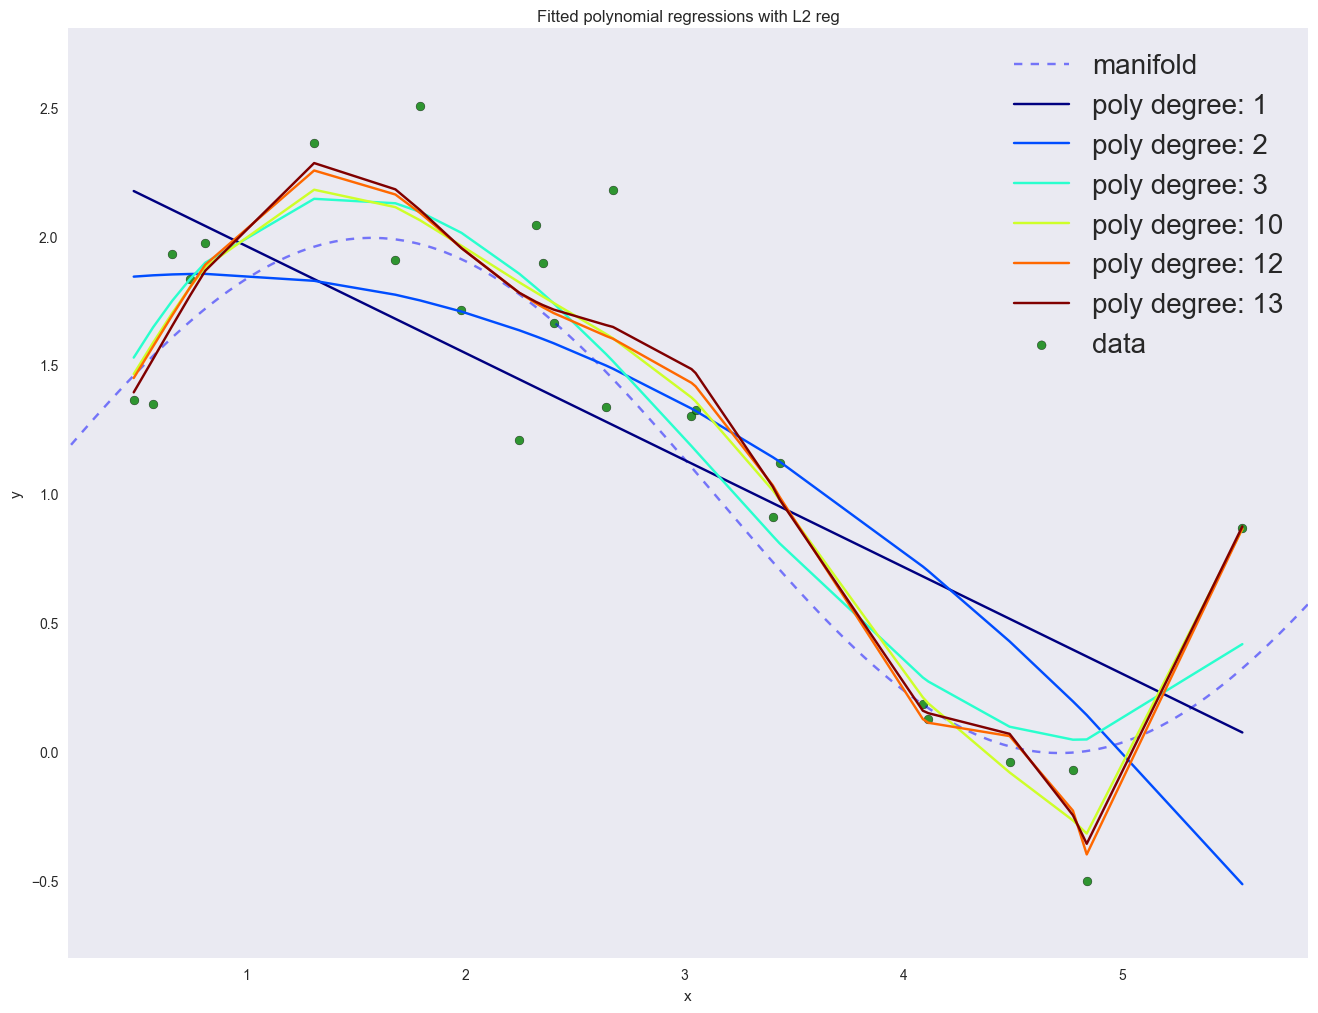

In [9]:
# define regularization parameter
lmbd = 0.1

degree_list = [1, 2, 3, 10, 12, 13]
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

w_list_l2 = []
for ix, degree in enumerate(degree_list):
    dlist = [[1]*data['x_train'].shape[0]] + map(lambda n: data['x_train']**n, range(1, degree + 1))
    X = np.array(dlist).T
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + lmbd*np.eye(X.shape[1])), X.T), data['y_train'])
    w_list_l2.append((degree, w))
    y_hat = np.dot(w, X.T)
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='poly degree: %i' % degree)

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted polynomial regressions with L2 reg')
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

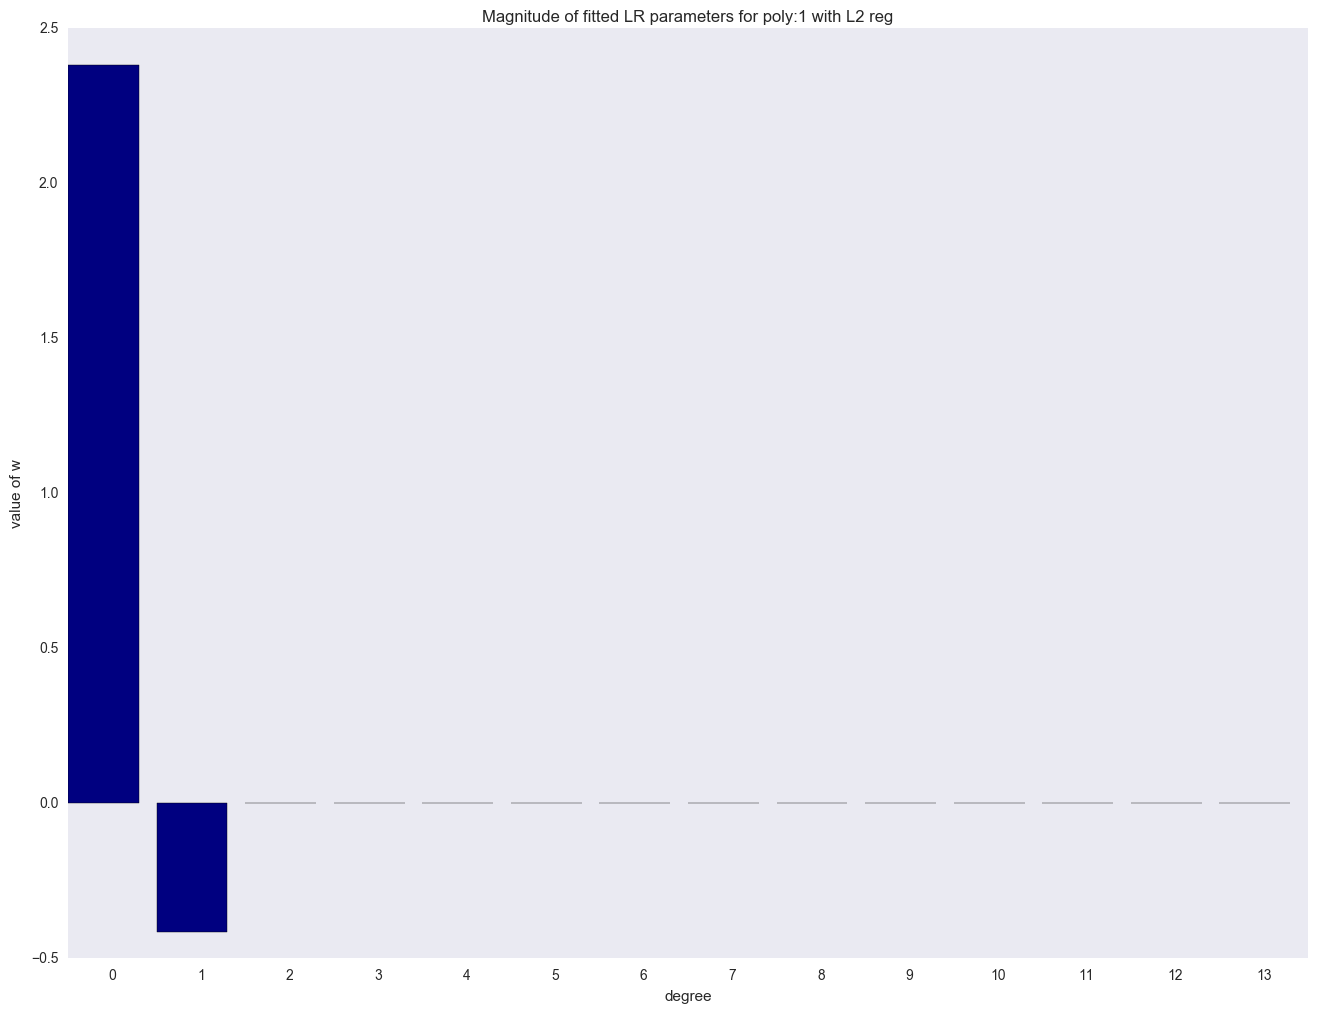

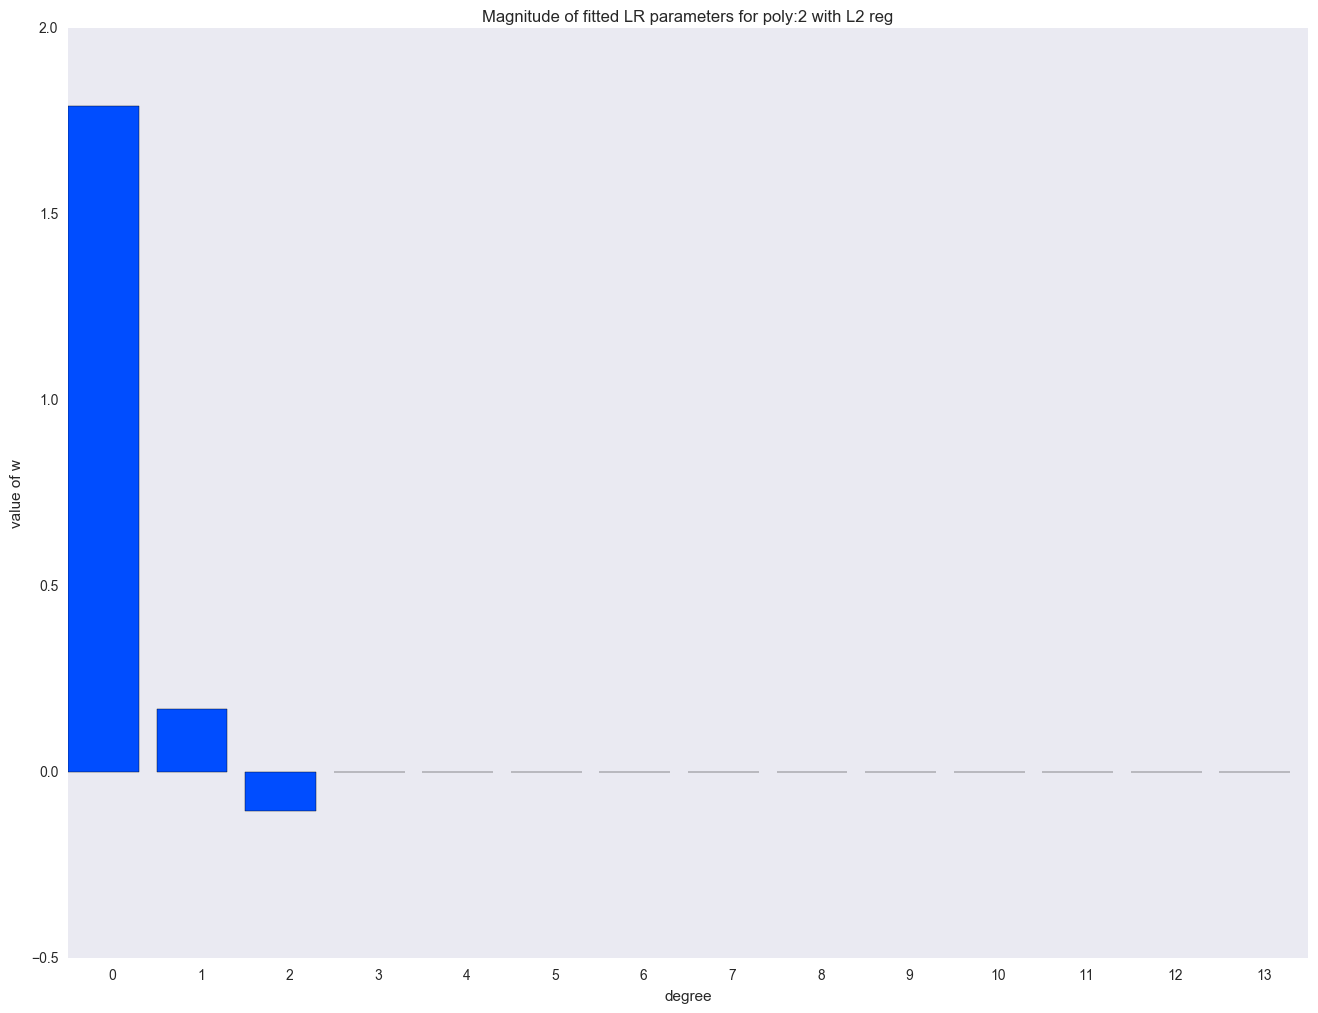

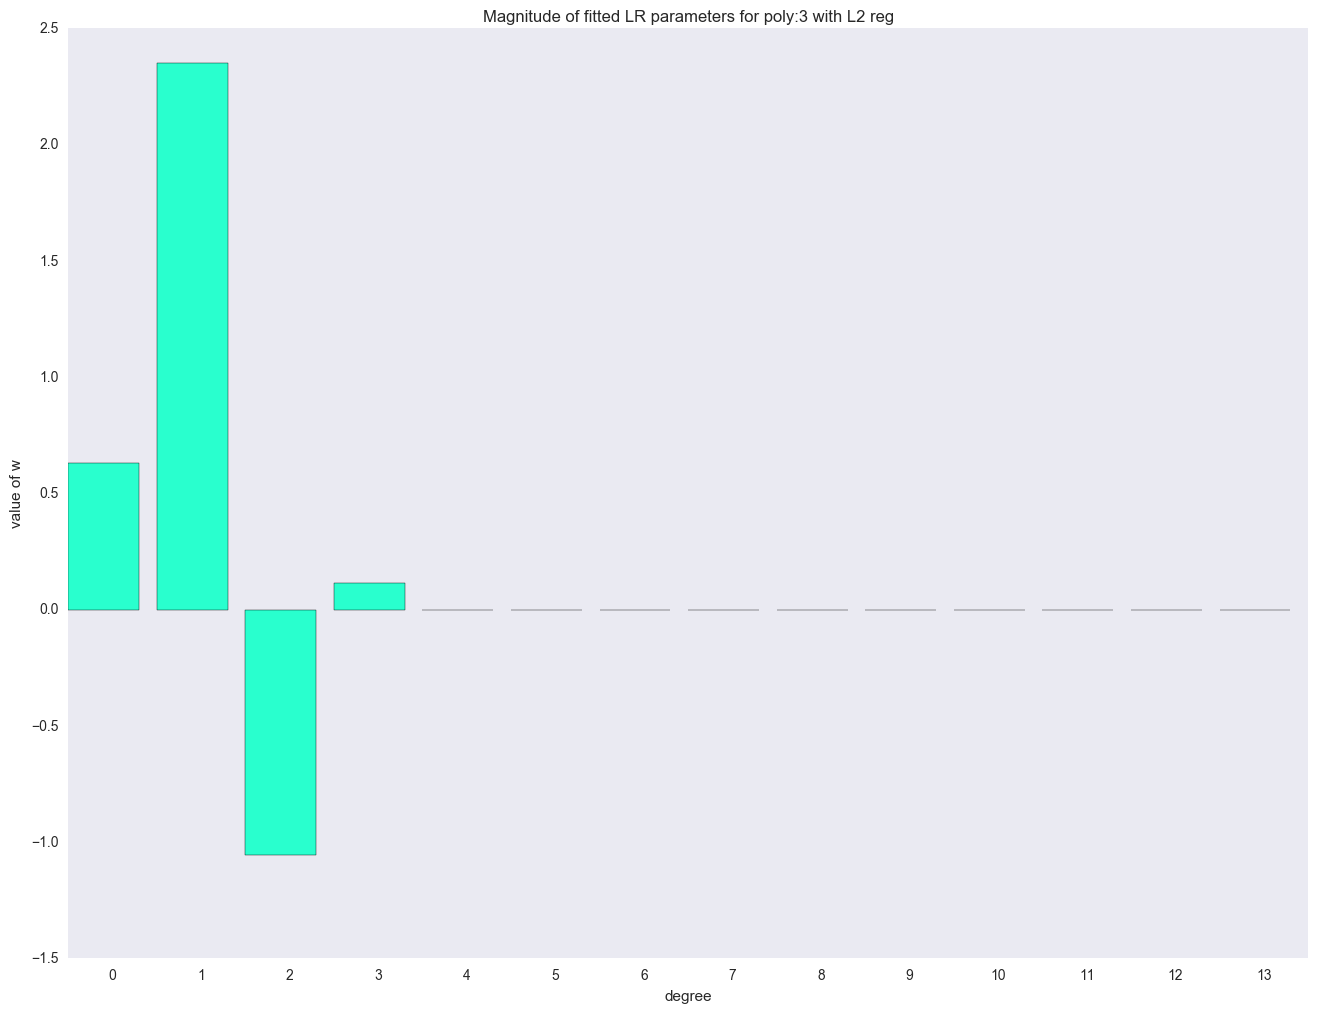

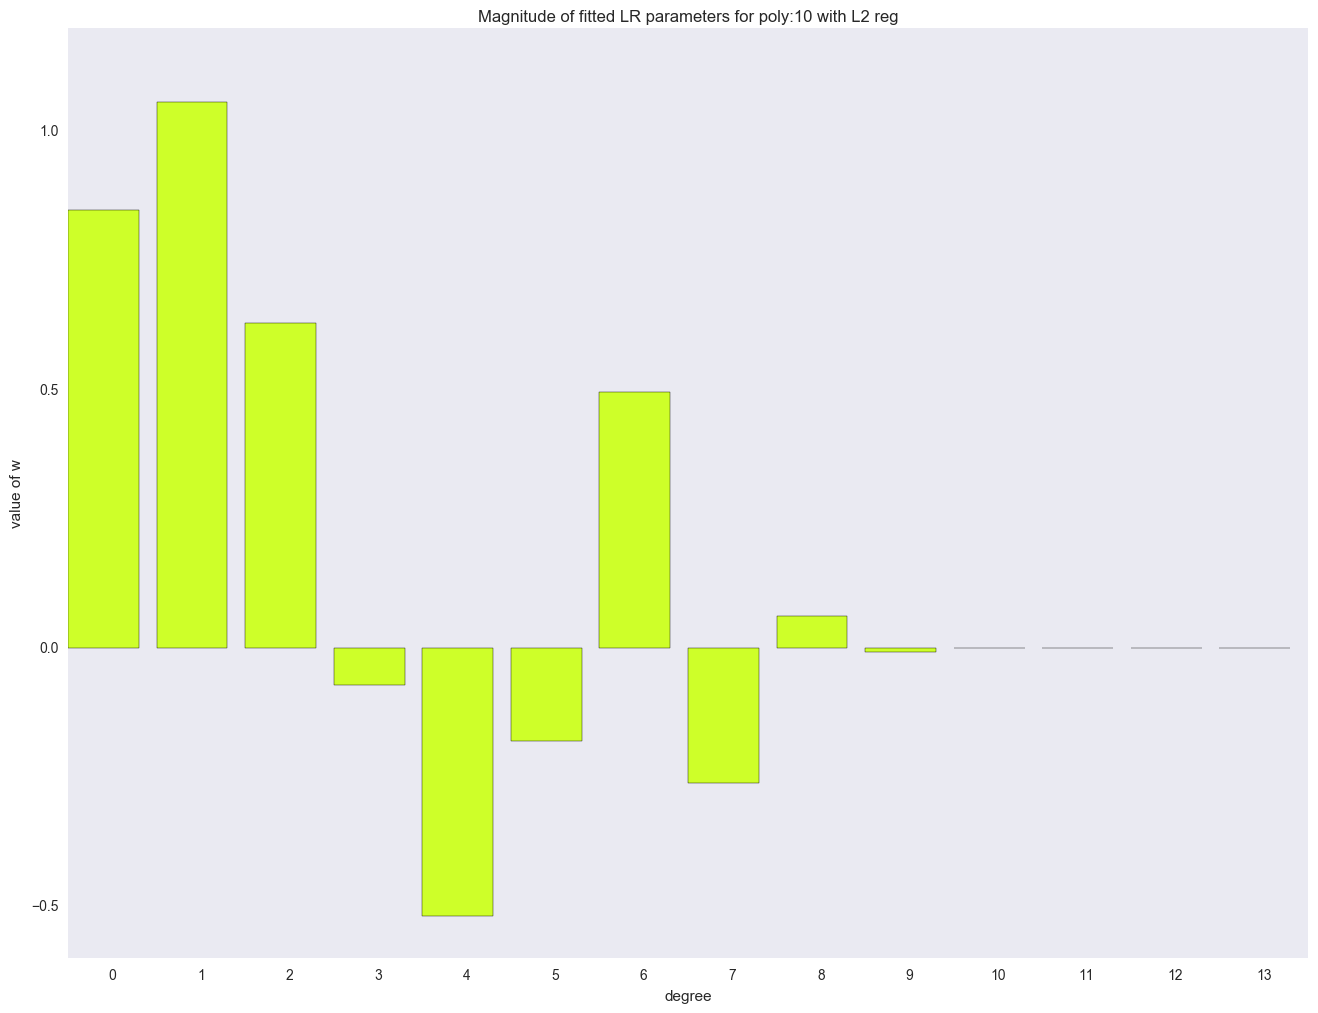

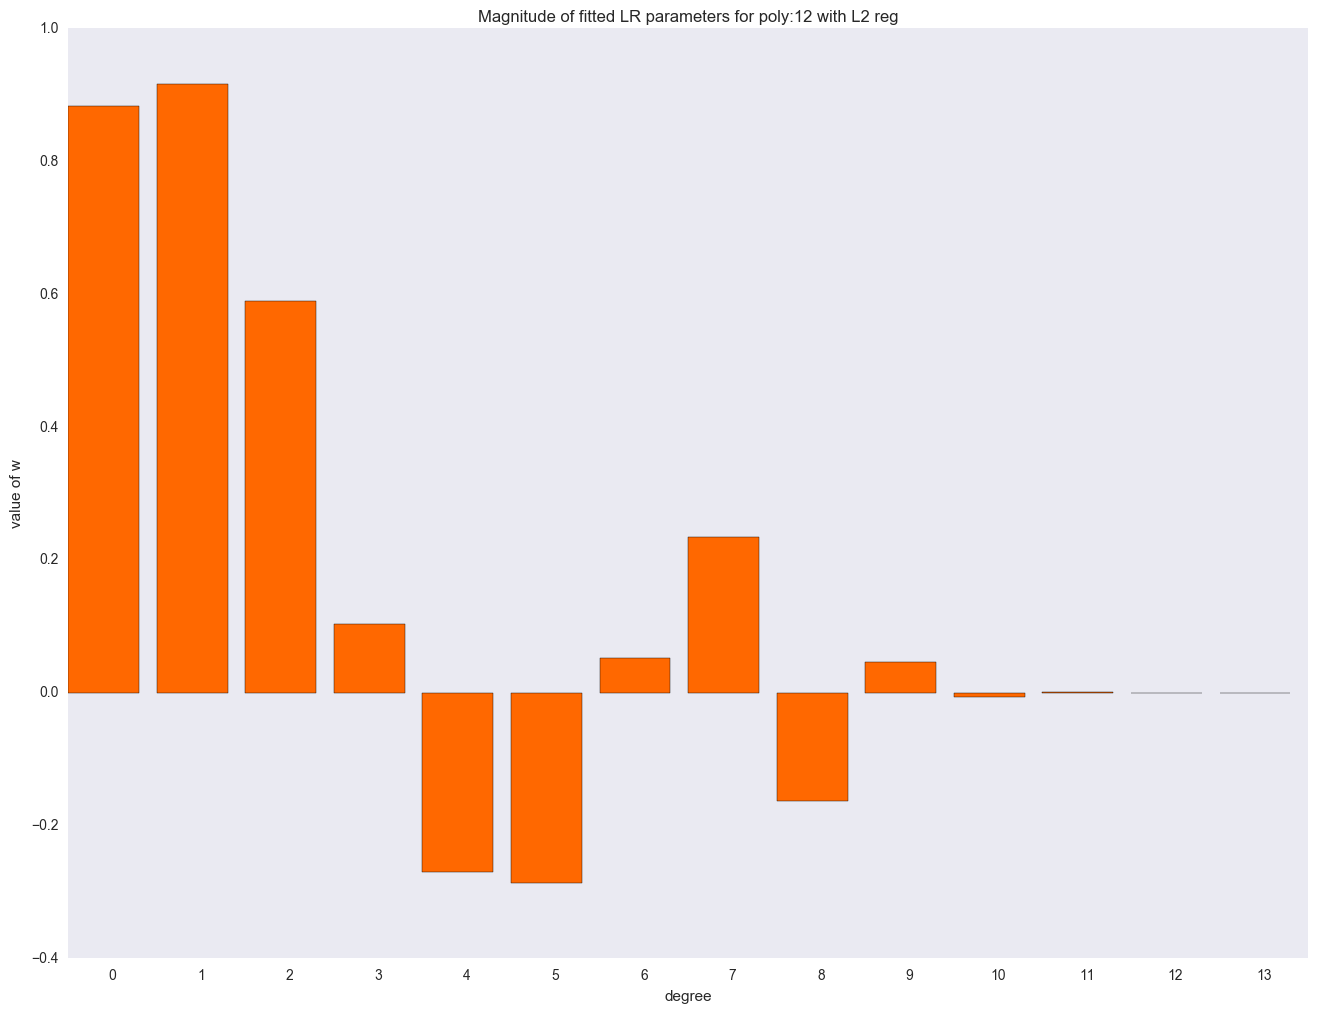

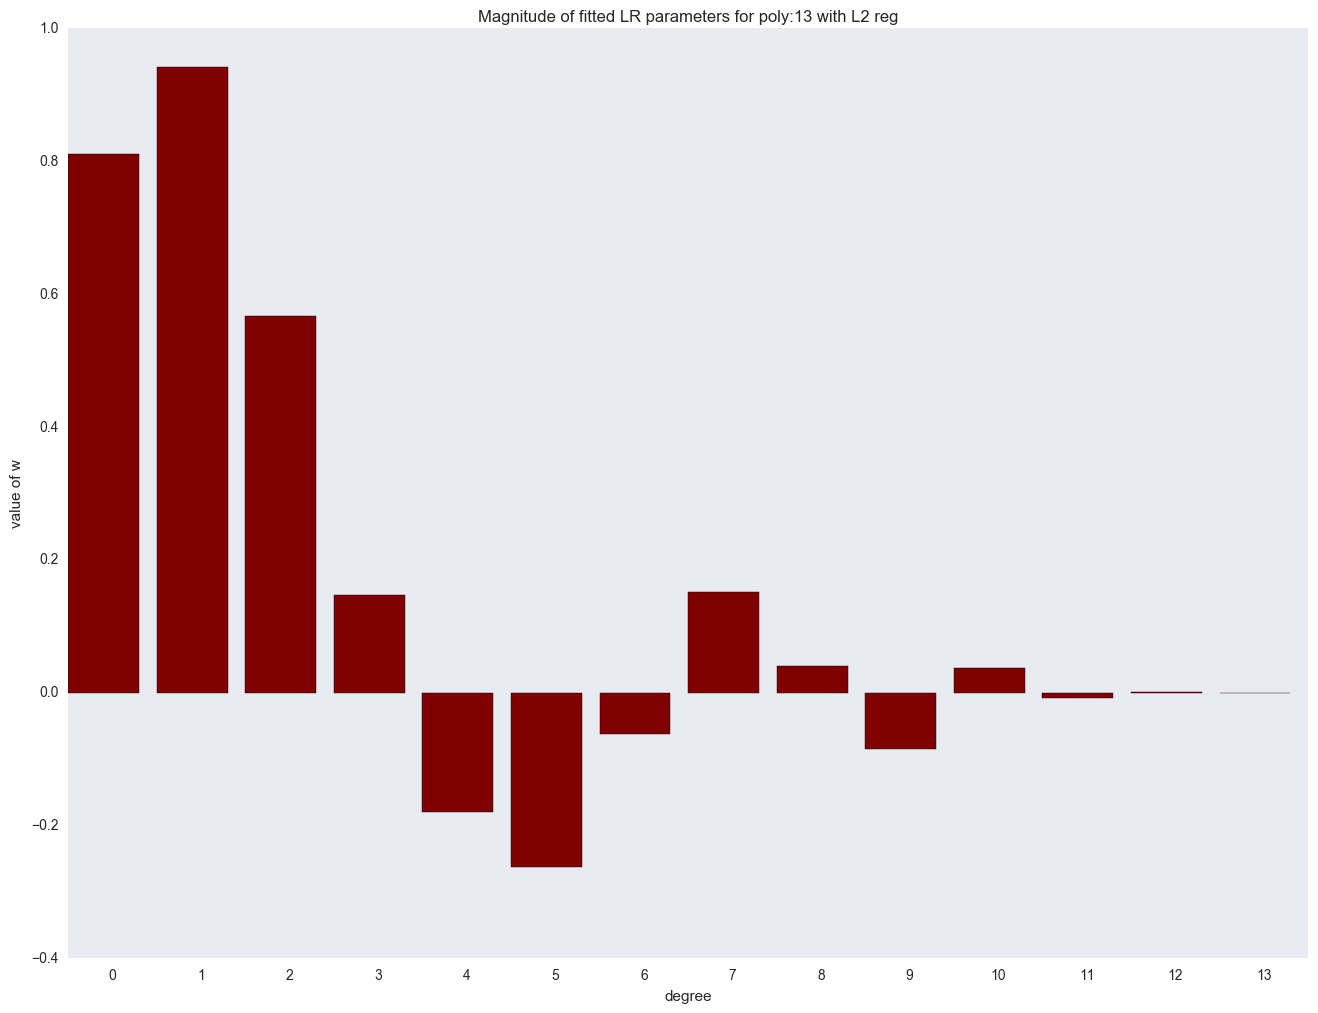

In [10]:
for ix, t in enumerate(w_list_l2):
    degree, w = t
    fig, ax = plt.subplots()
    plt.bar(range(max(degree_list) + 1), np.hstack((w, [0]*(max(degree_list) - w.shape[0] + 1))), color=colors[ix])
    plt.title('Magnitude of fitted LR parameters for poly:%i with L2 reg' % degree)
    plt.xlabel('degree')
    plt.ylabel('value of w')
    ax.set_xticks(np.array(range(max(degree_list) + 1)) + 0.5)
    ax.set_xticklabels(range(max(degree_list) + 1))
    plt.show()

# L1 regularization

Lets penalty for large L1 norm of the weights vector:
$$\Large R\left(\vec{w}\right) = \left\| \vec{w} \right\|_1 = \sum_{j=1}^m \left| w_j \right|$$
then new objective will be:
$$\Large \mathcal{L}\left(X, \vec{y}, \vec{w} \right) = \frac{1}{2n} \sum_{i=1}^n \left(\vec{x_i}^T \vec{w} - y_i\right)^2 + \lambda \sum_{j=1}^m \left| w_j \right|$$
Unfortunately, in general, there is no explicit formula for optimal weights. We will use gradient descent to estimate optimal values of weights. Lets find gradient wrt weights:
$$\Large \frac{\partial \mathcal{L}}{\partial w_j} = \frac{1}{n}\sum_{i=1}^n \left(\vec{x_i}^T \vec{w} - y_i\right) \vec{x_i} + \lambda \text{sign}(\vec{w})$$
So update formula of weights is:
$$\Large \vec{w}_{\text{new}} := \vec{w} - \alpha \frac{\partial \mathcal{L}}{\partial \vec{w}}$$
where:
* $\large \alpha$ is step of gradient descent (learning rate)

In [11]:
lmbd = 1
degree = 13
dlist = [[1]*data['x_train'].shape[0]] + map(lambda n: data['x_train']**n, range(1, degree + 1))
X = np.array(dlist).T

# define MSE function to evaluate model
# we expect that durint training process this value will be decreasing
def mse(u, v):
    return ((u - v)**2).sum()/u.shape[0]

# initial weights of the model
w = np.array([-1.0] * X.shape[1])
# maximim number of iterations
n_iter = 20
# alpha or learning rate
lr = 0.1
# we will keep all MSE values to plot graph
loss = []
for ix in range(n_iter):
    w -= lr*(np.dot(np.dot(X, w) - data['y_train'], X)/X.shape[0] + lmbd*np.sign(w))
    y_hat = np.dot(X, w)
    loss.append(mse(data['y_train'], y_hat))
    print loss[-1]

1.30512309607e+52
1.21979102448e+86
1.14003816795e+120
1.06549974406e+154
9.95834820717e+187
9.3072475679e+221
8.69871744673e+255
8.12997448128e+289
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
nan


# Standardization 

To avoid divergence and make magnitude of gradients to be at the same scale we can remove the mean from each feature and scale them to unit variance. First we need to compute sample mean and sample standard deviation of the training set:
$$\Large \begin{array}{rcl} \overline{\mu}_{\cdot j} &=& \frac{1}{n} \sum_{i=1}^n x_{ij} \\
\overline{\sigma}_{\cdot j} &=& \sqrt{\frac{1}{n} \sum_{i=1}^n \left( x_{ij} - \overline{\mu}_{\cdot j} \right)}
\end{array}$$
Then apply transformation:
$$\Large \vec{x}_{\text{new}} = \frac{\vec{x} - \overline{\mu}}{\overline{\sigma}}$$

X mean:
[  1.00000000e+00   2.61717625e+00   8.89178866e+00   3.46858633e+01
   1.47337824e+02   6.62964718e+02   3.10664370e+03   1.49946179e+04
   7.40097896e+04   3.71757450e+05   1.89408958e+06   9.76488362e+06
   5.08473839e+07   2.67042329e+08]
X std
[  0.00000000e+00   1.42904764e+00   8.26280332e+00   4.36295151e+01
   2.28694895e+02   1.20605446e+03   6.41842261e+03   3.44672461e+04
   1.86543640e+05   1.01602565e+06   5.56120143e+06   3.05530627e+07
   1.68325268e+08   9.29250585e+08]


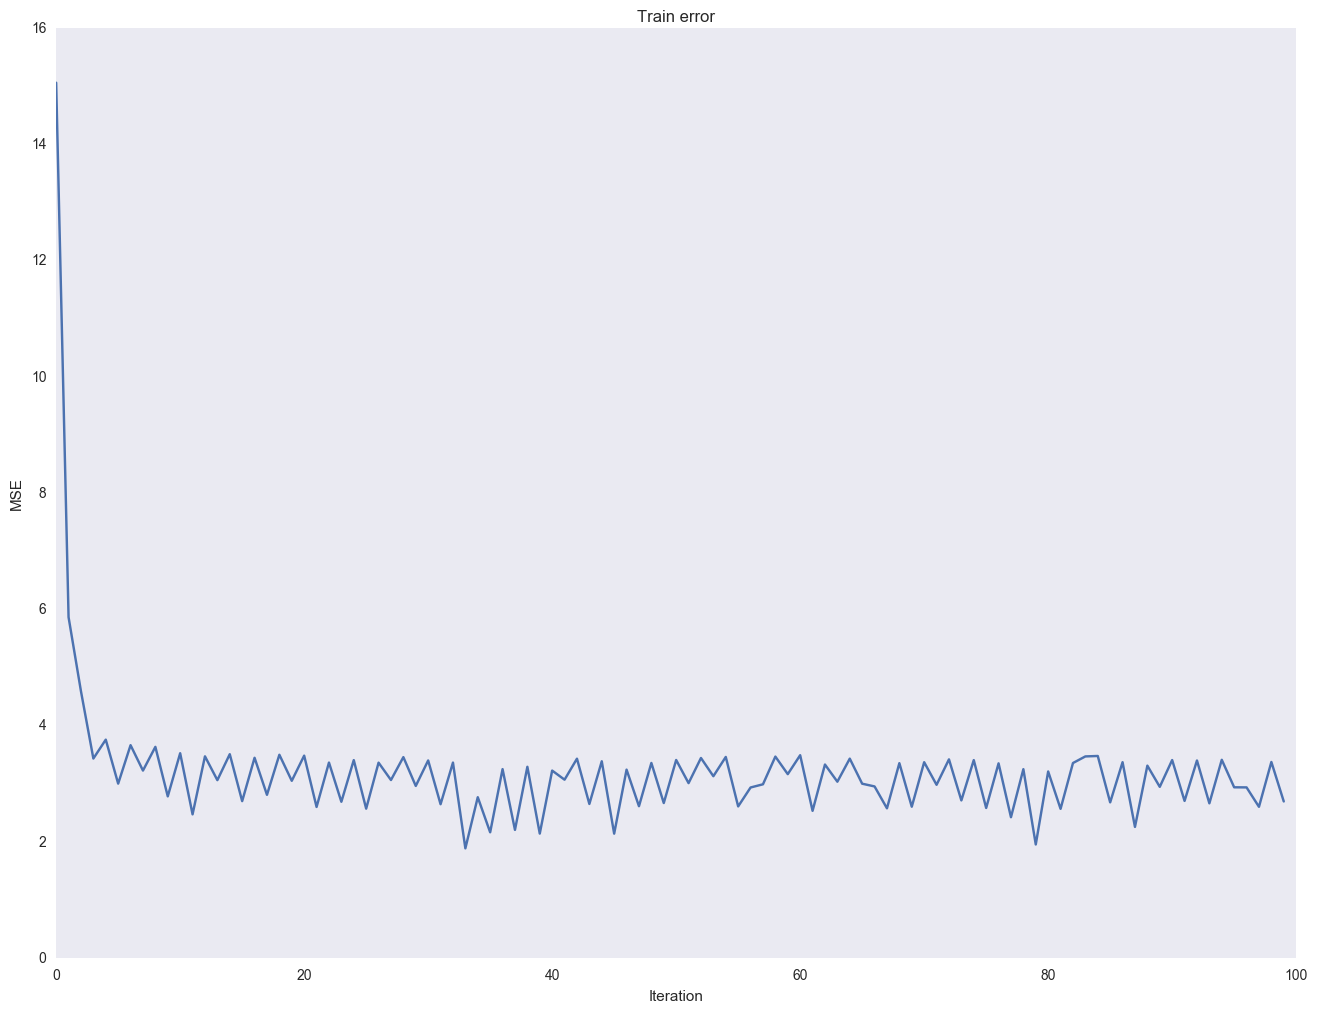

In [12]:
lmbd = 1
degree = 13
dlist = [[1]*data['x_train'].shape[0]] + map(lambda n: data['x_train']**n, range(1, degree + 1))
X = np.array(dlist).T
# compute sample mean
x_mean = X.mean(axis=0)
print 'X mean:'
print x_mean
# compute sample std
x_std = X.std(axis=0)
print 'X std'
print x_std
# apply transformation
X = (X - x_mean)/x_std
# fix first column with ones
X[:, 0] = 1.0

def mse(u, v):
    return ((u - v)**2).sum()/u.shape[0]

w = np.array([-1.0] * X.shape[1])
n_iter = 100
lr = 0.1
loss = []
for ix in range(n_iter):
    w -= lr*(np.dot(np.dot(X, w) - data['y_train'], X)/X.shape[0] + lmbd*np.sign(w))
    y_hat = np.dot(X, w)
    loss.append(mse(data['y_train'], y_hat))

plt.plot(loss)
plt.title('Train error')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()

Lets prettify code and plot L1 regularized polynomial regressions

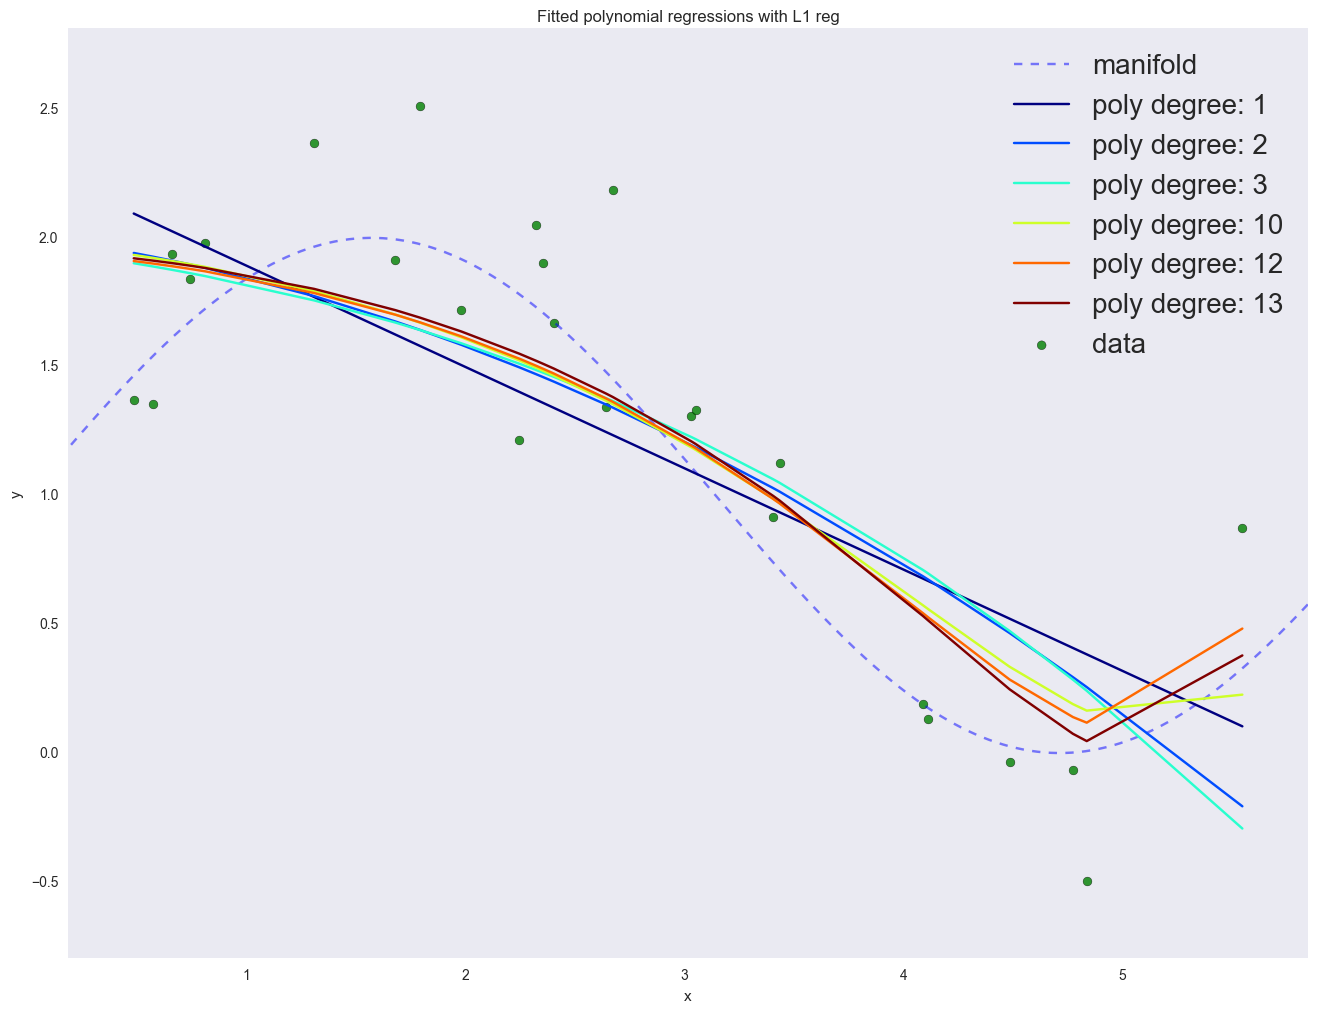

In [13]:
degree_list = [1, 2, 3, 10, 12, 13]
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

def mse(u, v):
    return ((u - v)**2).sum()/u.shape[0]

def fit_lr_l1(X, y, lmbd, n_iter=100, lr=0.1):
    w = np.array([-1.0] * X.shape[1])
    loss = []
    for ix_iter in range(n_iter):
        w -= lr*(np.dot(np.dot(X, w) - y, X)/X.shape[0] +lmbd*np.sign(w))
        y_hat = np.dot(X, w)
        loss.append(mse(y, y_hat))
    return w, y_hat, loss
    
w_list_l1 = []
for ix, degree in enumerate(degree_list):
    dlist = [[1]*data['x_train'].shape[0]] + map(lambda n: data['x_train']**n, range(1, degree + 1))
    X = np.array(dlist).T
    x_mean = X.mean(axis=0)
    x_std = X.std(axis=0)
    X = (X - x_mean)/x_std
    X[:, 0] = 1.0
    w, y_hat, loss = fit_lr_l1(X, data['y_train'], lmbd=0.05)
    w_list_l1.append((degree, w))
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='poly degree: %i' % degree)
    

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted polynomial regressions with L1 reg')
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

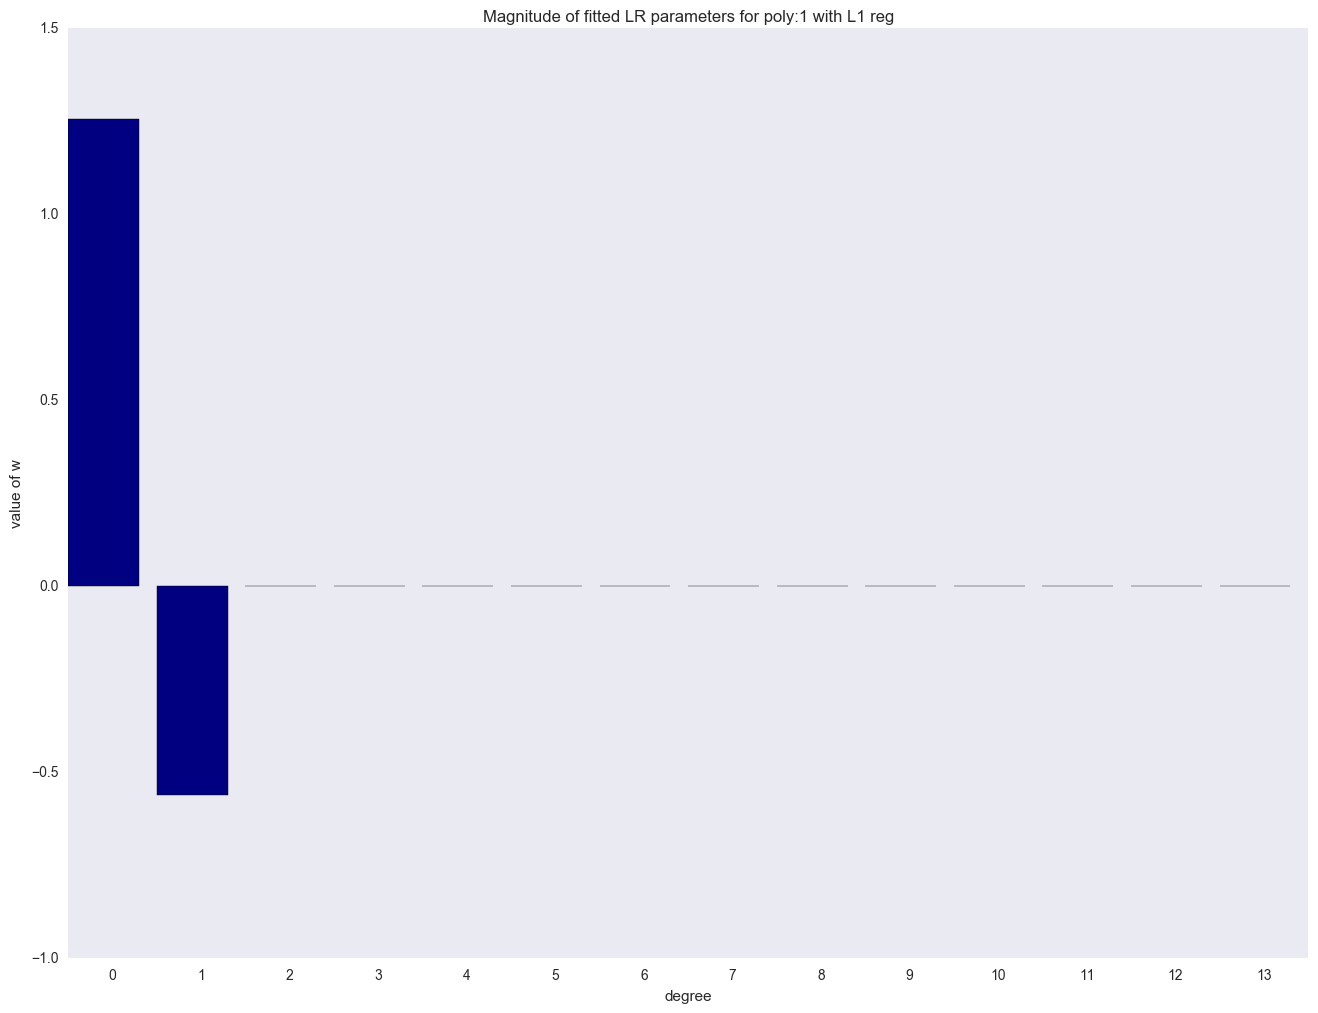

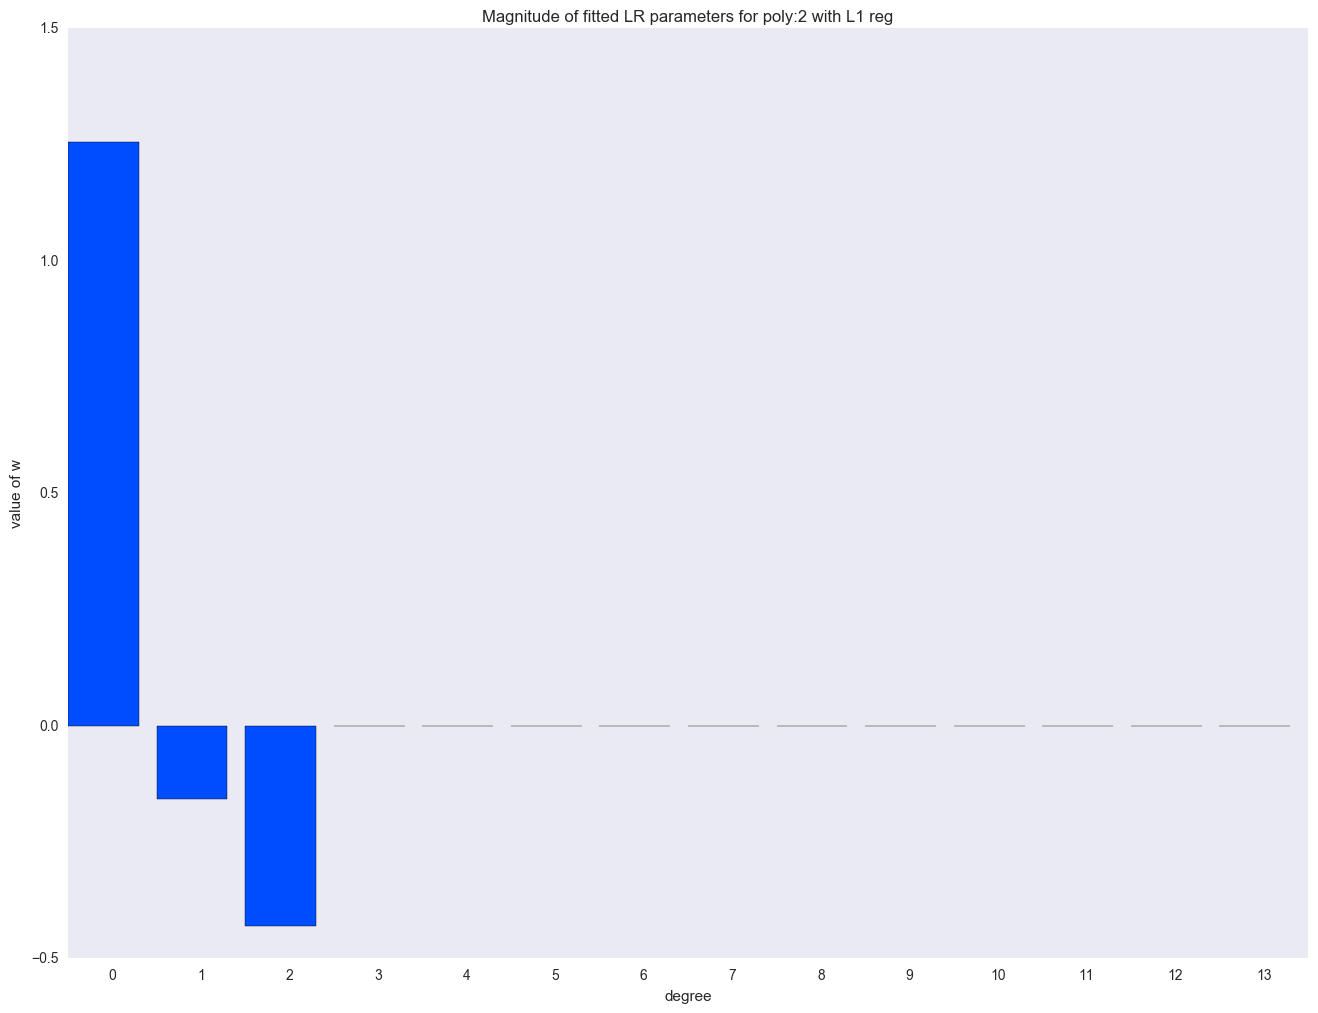

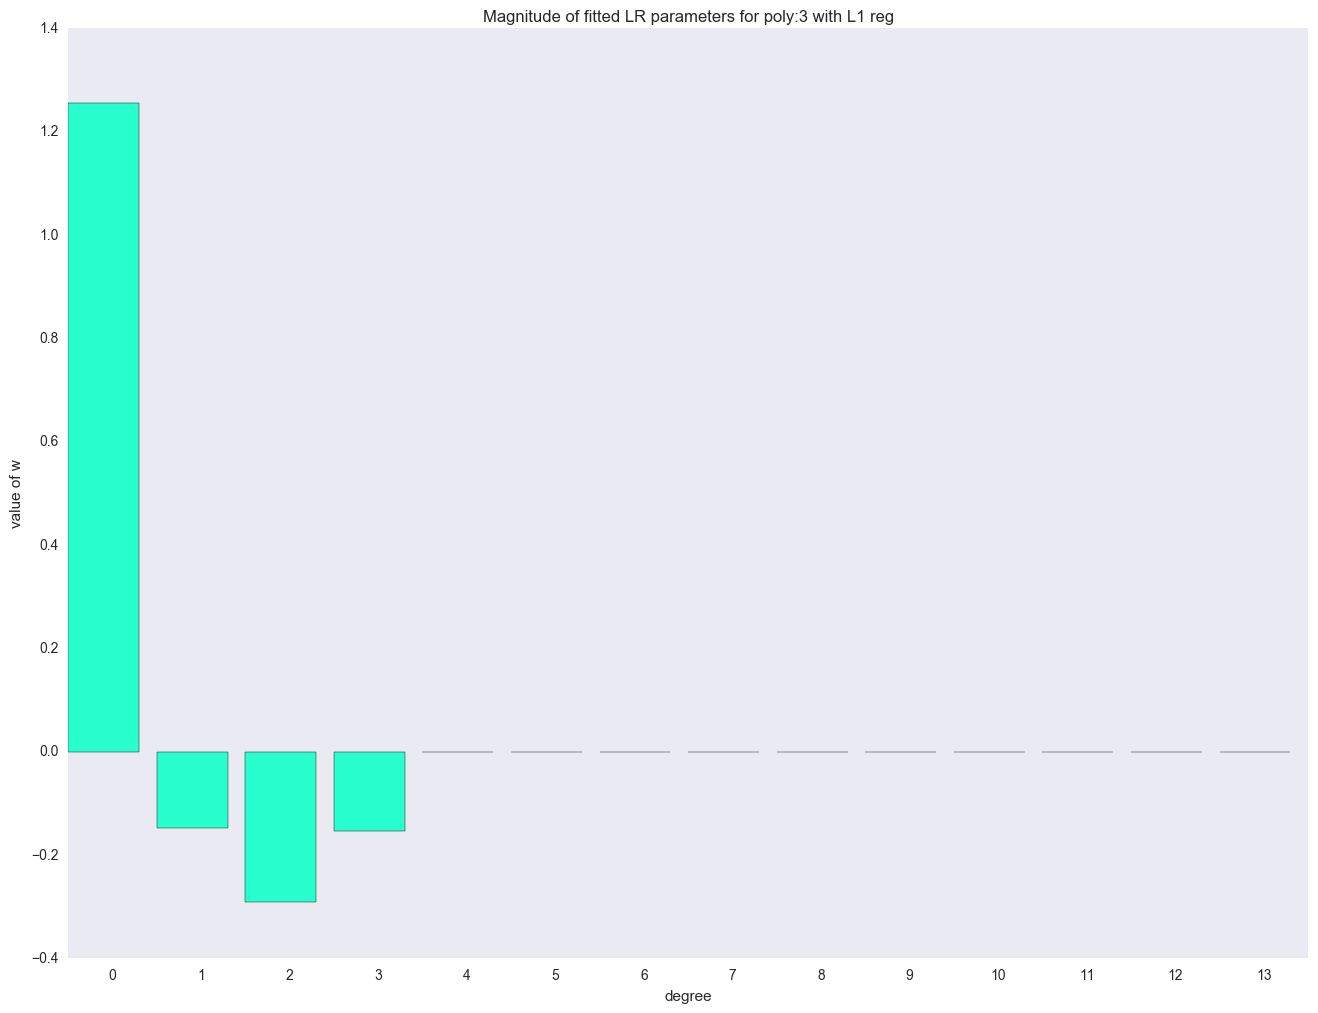

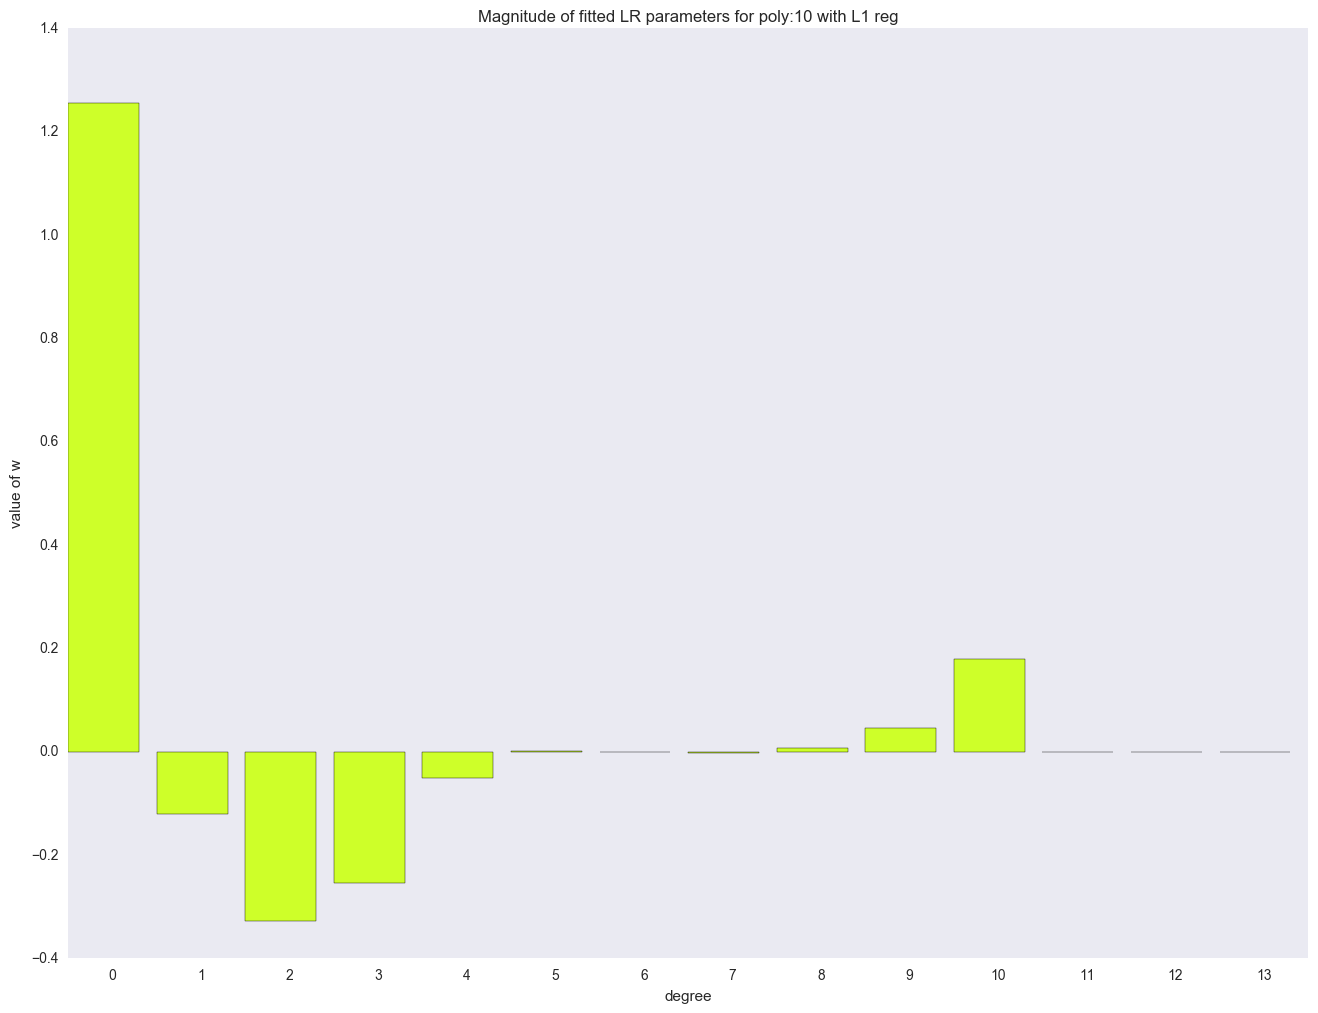

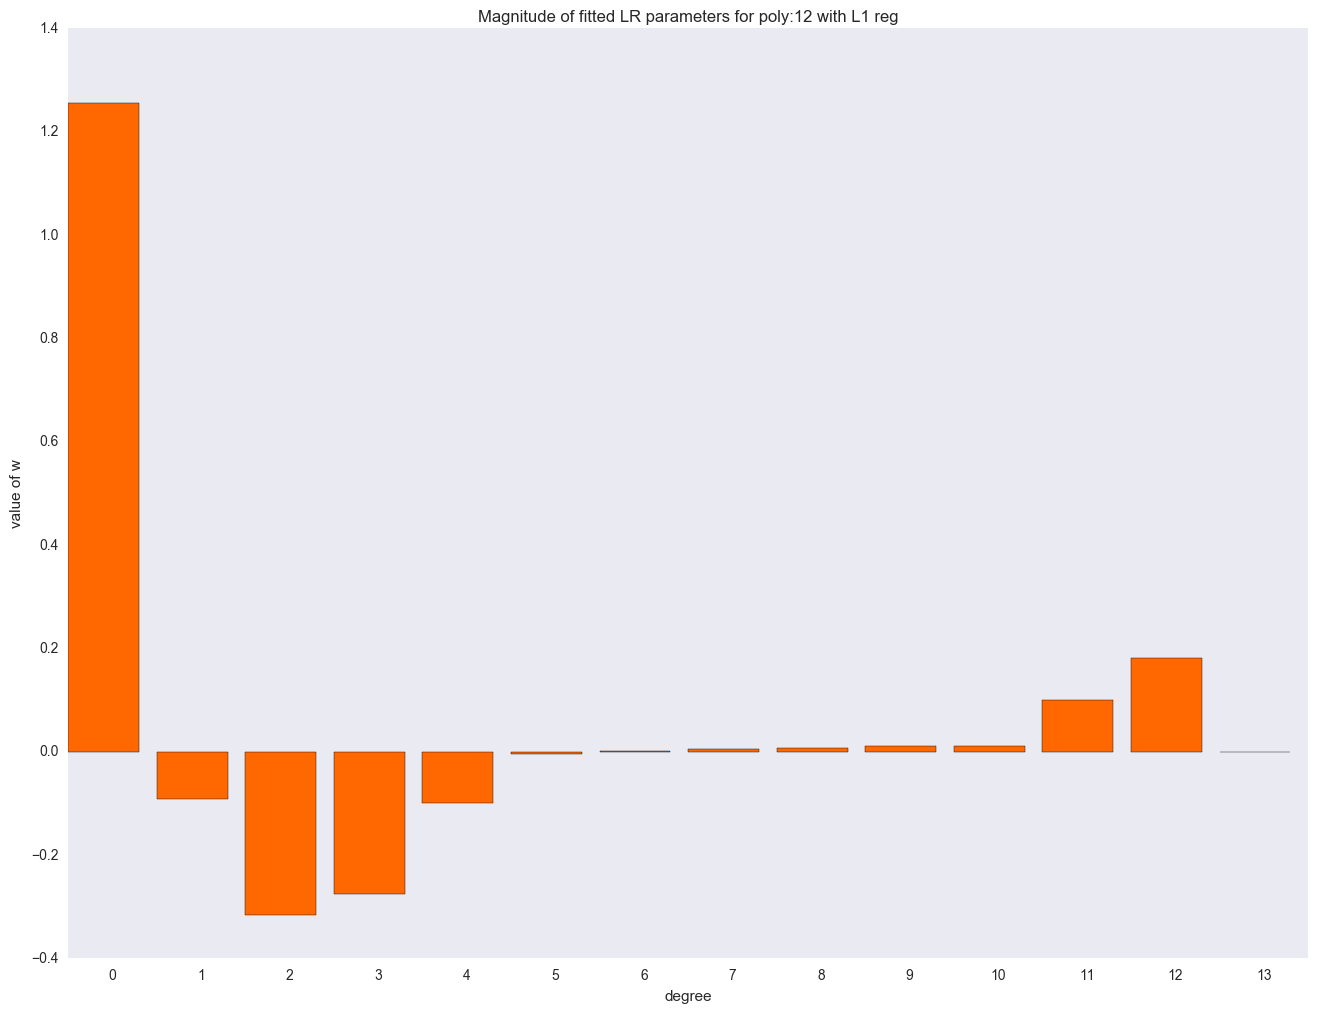

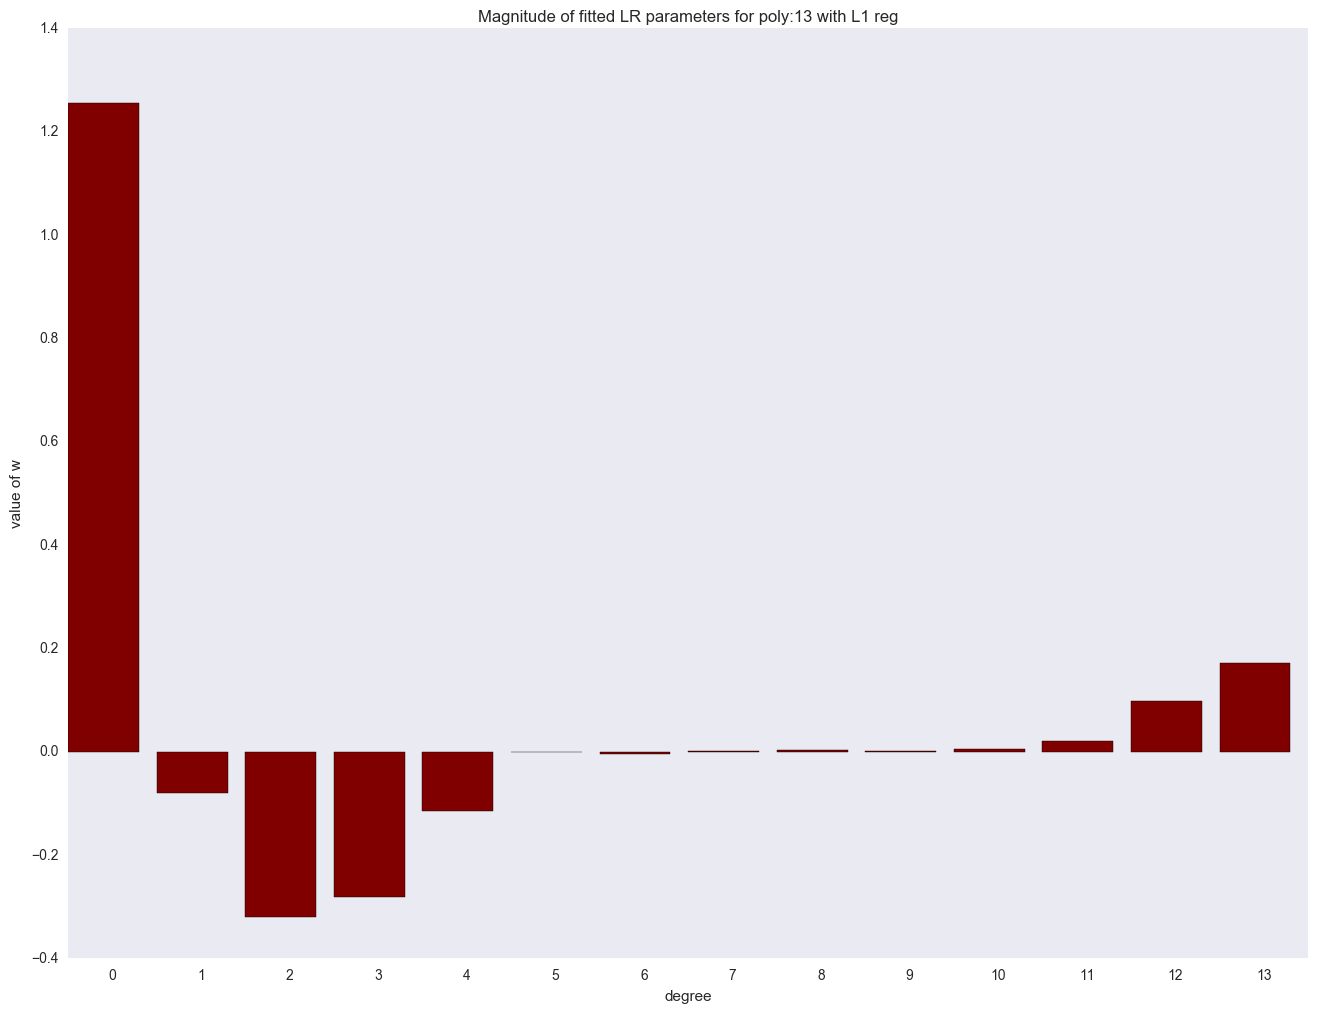

In [14]:
for ix, t in enumerate(w_list_l1):
    degree, w = t
    fig, ax = plt.subplots()
    plt.bar(range(max(degree_list) + 1), np.hstack((w, [0]*(max(degree_list) - w.shape[0] + 1))), color=colors[ix])
    plt.title('Magnitude of fitted LR parameters for poly:%i with L1 reg' % degree)
    plt.xlabel('degree')
    plt.ylabel('value of w')
    ax.set_xticks(np.array(range(max(degree_list) + 1)) + 0.5)
    ax.set_xticklabels(range(max(degree_list) + 1))
    plt.show()

![5fcv](images/sklearn-logo.png)

# Model selection

Eventually our regularized linear regression model have not only weights $\large \vec{w}$ as parameters, at least one more - regularization hyperparameter $\large \lambda$:
$$\Large \Theta = \left\{\vec{w}, \lambda\right\}$$

Moreover, we can't simultaneously tune weigts and regularization parameter. So we usually split dataset into at least three subsets (or variations):
* training set - for fitting parameters of the model
* validation set - for turning hyperparameters
* test set (hold out) - for final testing of the model, this set can not effect on any of parameters to keep test loss estimation honest.

Lets take one real dataset with boston house-prices from http://scikit-learn.org/stable/datasets/

In [15]:
# import dataset loader from sklearn
import sklearn.datasets

In [16]:
# load dataset
boston = sklearn.datasets.load_boston()
print 'Shape of the data:', boston.data.shape
data = {}
# split in into train/test data
data['x_train'] = boston.data[100:, :]
data['x_test'] = boston.data[:100, :]
data['y_train'] = boston.target[100:]
data['y_test'] = boston.target[:100]

Shape of the data: (506, 13)


In [17]:
# lets look at head of the dataset
import pandas as pd
pd.DataFrame(boston.data, columns=boston.feature_names).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


For further experiments we will use ElasticNet model from http://scikit-learn.org/stable/modules/linear_model.html, which use сonvex combination of L1 and L2 regularization.

ElasticNet:
$$\Large \mathcal{L}\left(\Theta, X, \vec{y}\right) = \frac{1}{2n} \left\|X\vec{w} - \vec{y}\right\|_2^2 + \lambda \left( \gamma \left\|\vec{w}\right\|_1 + \frac{1}{2} \left(1 - \gamma\right) \left\|\vec{w}\right\|_2^2 \right)$$
where:
* $\lambda$ is for *alpha*
* $\gamma$ is gor *l1_ratio*

In [18]:
# import ElasticNet from sklearn
from sklearn.linear_model import ElasticNet

In [19]:
# import MSE from sklearn
from sklearn.metrics import mean_squared_error

In [20]:
# http://scikit-learn.org/stable/modules/preprocessing.html
# StandardScaler do for us standardization of dataset
from sklearn.preprocessing import StandardScaler
# PolynomialFeatures calculate pilynomial features of the datase
from sklearn.preprocessing import PolynomialFeatures

Sklearn has special interface for *transformers* and *models* estimators. 
* Transformer:
    * fit
    * transform
    * fit_transform
* Model
    * fit
    * predict
    
Lets make replicate one of previous experiments with sklearn.

In [21]:
# degree of polynom
degree = 2
# hyperparameters of ElasticNet
alpha = 0.01
l1_ratio = 0.5

# craete instance of polynomial transformer
pf = PolynomialFeatures(degree=degree, include_bias=False)
# craete instance of standardize transformer
ss = StandardScaler()

# fit ss and pf on train set, then transform it
X_train = ss.fit_transform(pf.fit_transform(data['x_train']))
print 'Shape of X_train after polynomial transformation:', X_train.shape
# transform test set using fitted ss and pf
X_test = ss.transform(pf.transform(data['x_test']))

# create instance of ElasticNet model
model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=True)
# fit the model on train set
model = model.fit(X_train, data['y_train'])
# predict target values for train set
y_hat_train = model.predict(X_train)
# predict target values for test set
y_hat_test = model.predict(X_test)

# calculate metrics for train/test
print 'Train error:', mean_squared_error(data['y_train'], y_hat_train)
print 'Test error:', mean_squared_error(data['y_test'], y_hat_test)

Shape of X_train after polynomial transformation: (406, 104)
Train error: 8.53570837527
Test error: 12.1403416817


/usr/local/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


We will use k-fold cross-valdation http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection. Here is an expample of 5-folds:
![5fcv](images/cv.png)

In [22]:
# import KFold from sklearn
from sklearn.model_selection import KFold

In [23]:
# create instance of 5-folder 
kf = KFold(n_splits=5, shuffle=True)

# performance of the model on train splits of train set
mse_train_folds = []
# performance of the model on validation splits of train set
mse_valid_folds = []
# iterate over splits
for ix_train, ix_valid in kf.split(X_train):
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=True)
    model = model.fit(X_train[ix_train, :], data['y_train'][ix_train])
    # record MSE on train splits
    mse_train_folds.append(
        mean_squared_error(
            data['y_train'][ix_train], 
            model.predict(X_train[ix_train, :])))
    # record MSE on test splits
    mse_valid_folds.append(
        mean_squared_error(
            data['y_train'][ix_valid], 
            model.predict(X_train[ix_valid, :])))

# calculate average performance on splits
mse_train_folds = np.mean(mse_train_folds)
mse_valid_folds = np.mean(mse_valid_folds)

# train model on entire train set
model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=True)
model = model.fit(X_train, data['y_train'])
# make prediction usind the model
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

print 'Train error on folds:', mse_train_folds
print 'Train error:', mean_squared_error(data['y_train'], y_hat_train)
print 'Valid error:', mse_valid_folds
print 'Test error:', mean_squared_error(data['y_test'], y_hat_test)

Train error on folds: 8.04735366326
Train error: 8.53570837527
Valid error: 13.9459873335
Test error: 12.1403416817


We can see that validation error is much better estimator of test error rather then train error, it gives us possibility to evaluate models on train set as if they are tested on hold out set. Creating such splits is very important, any misstake during this process can lead to fail of all research.

Lets use this technique to find optimal L1 regularization parameter.

In [24]:
# progress bars to visualize long job
from tqdm import tqdm

In [25]:
alpha = 0.022
degree = 2
# list of 100 different L1 values to test
l1_ratio_list = np.linspace(0.01, 1, 100)

kf = KFold(n_splits=2, shuffle=False)
pf = PolynomialFeatures(degree=degree, include_bias=False)
ss = StandardScaler()
X_train = ss.fit_transform(pf.fit_transform(data['x_train']))
X_test = ss.transform(pf.transform(data['x_test']))

mse_train = []
mse_valid = []
mse_test = []
# iterate through all values of L1 parameter and show progress bar
for l1_ratio in tqdm(l1_ratio_list):
    mse_valid_folds = []
    for ix_train, ix_valid in kf.split(X_train):
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=True)
        model = model.fit(X_train[ix_train, :], data['y_train'][ix_train])
        mse_valid_folds.append(
            mean_squared_error(
                data['y_train'][ix_valid], 
                model.predict(X_train[ix_valid, :])))
    mse_valid.append(np.mean(mse_valid_folds))
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=True)
    model = model.fit(X_train, data['y_train'])
    mse_train.append(mean_squared_error(data['y_train'], model.predict(X_train)))
    mse_test.append(mean_squared_error(data['y_test'], model.predict(X_test)))

100%|██████████| 100/100 [00:05<00:00, 18.48it/s]


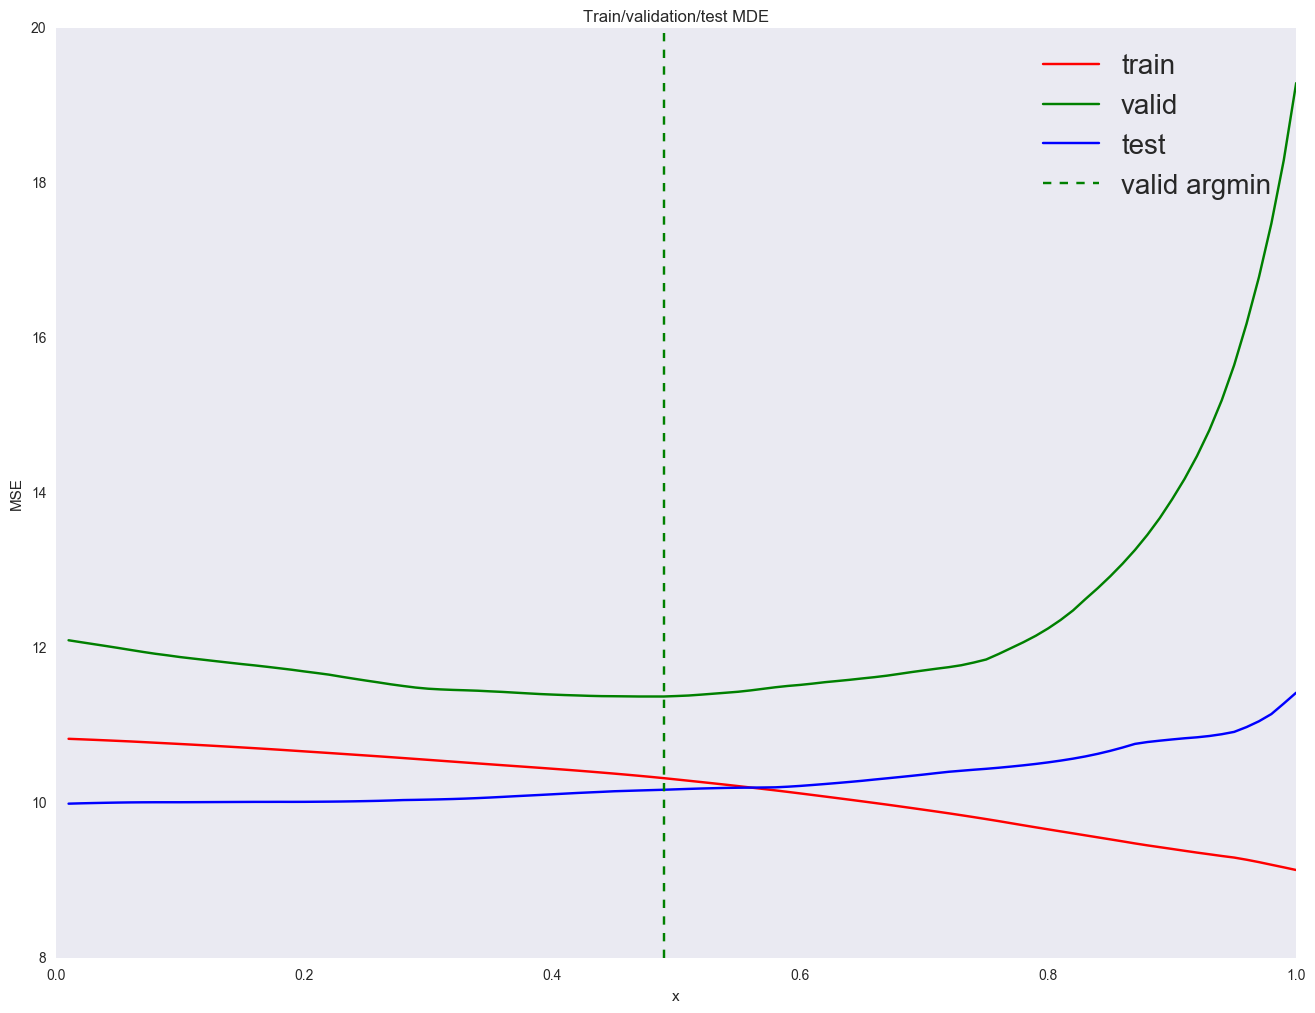

In [26]:
plt.plot(l1_ratio_list, mse_train, c='r', label='train')
plt.plot(l1_ratio_list, np.array(mse_valid)/7, c='g', label='valid')
plt.plot(l1_ratio_list, mse_test, c='b', label='test')

x = sorted(zip(l1_ratio_list, mse_valid), key=lambda t: t[1])[0][0]
plt.axvline(x, color='g', linestyle='--', label='valid argmin')

plt.legend(loc='upper right', prop={'size': 20})
plt.title('Train/validation/test MDE')
plt.xlabel('x')
plt.ylabel('MSE')
plt.show()

To search in bigger space of hyperparameters sklearn have Pipeline class (http://scikit-learn.org/stable/modules/pipeline.html), which can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification (Polynomial $\large \rightarrow$ StandardScalar $\large \rightarrow$ ElasticNet). Pipeline serves two purposes here:
* Convenience: You only have to call fit and predict once on your data to fit a whole sequence of estimators.
* Joint parameter selection: You can grid search over parameters of all estimators in the pipeline at once.

And we have GridSearchCV class (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) which can do for us exhaustive search over specified parameter values for an estimator (we will use Pipeline as estimator). It is equivalent to search in the set of hypothesis space.

In [28]:
# import Pipeline from sklearn
from sklearn.pipeline import Pipeline

In [34]:
# create pipe with three steps
pipe = Pipeline(steps=[
    ('pf', PolynomialFeatures(include_bias=False)),
    ('ss', StandardScaler()),
    ('en', ElasticNet())
])
pipe.named_steps

{'en': ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
       max_iter=1000, normalize=False, positive=False, precompute=False,
       random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
 'pf': PolynomialFeatures(degree=2, include_bias=False, interaction_only=False),
 'ss': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [36]:
# import GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

In [37]:
parameters = {
    'pf__degree': [1, 2, 3],
    'en__alpha': [0.001, 0.01, 0.02, 0.1, 0.5],
    'en__l1_ratio': [0.001, 0.01, 0.1, 0.5, 0.9, 1]
}

for k, v in parameters.items():
    print k, v

pf__degree [1, 2, 3]
en__alpha [0.001, 0.01, 0.02, 0.1, 0.5]
en__l1_ratio [0.001, 0.01, 0.1, 0.5, 0.9, 1]


In [38]:
# import helper function which converts metrics into score function for GridSearch
from sklearn.metrics import make_scorer

grid_search = GridSearchCV(pipe, parameters, cv=3, n_jobs=1, verbose=1)

grid_search = grid_search.fit(data['x_train'], data['y_train'])

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:   12.7s finished


In [39]:
print 'Best params:', grid_search.best_params_
print 'Test score:', mean_squared_error(data['y_test'], grid_search.predict(data['x_test']))

Best params: {'en__l1_ratio': 0.1, 'en__alpha': 0.1, 'pf__degree': 2}
Test score: 9.72625553115


![5fcv](images/sklearn.png)

# Bayesian interpretation of LR
![5fcv](images/bayes_app.png)

## Recap of propability
* Joint probability: $\large p\left(x, y\right)$ is propability that both rv falls in same range or in discrete set ov values

* Marginal probability: $\large p\left(x\right) = \sum_y p\left(x, y\right)$

* Condition probability: $\large p\left(x \mid y\right)$ is probability of rv $\large x$ given that $\large y$ is already resolved; $\large p\left(x, y\right) = p\left(x \mid y\right) p\left(y\right) = p\left(y \mid x\right) p\left(x\right)$

* Bayes theorem: $\large p\left(y \mid x\right) = \dfrac{p\left(x \mid y\right) p\left(y\right)}{p\left(x\right)} = \dfrac{p\left(x \mid y\right) p\left(y\right)}{\sum_{z} p\left(x \mid z\right) p\left(z\right)}$

* Independence: $\large p\left(x, y\right) = p\left(x\right) p\left(y\right)$

## Simple example
* Let test for some disease gives true result in 95% of cases
* 1% of all people have that disease
* Somebody made this test today and it said that he has that disease
* What is the probability that that person have that disease?

In [53]:
p_test = 0.95
p_prior = 0.01
p_disease = p_test*p_prior / (p_test*p_prior + (1 - p_test)*(1 - p_prior))
# print 'Answer is %2.2f%%' % (p_disease*100)

$$\Large \color{green}{p\left(y \mid x\right)} = \dfrac{\color{orange}{p\left(x \mid y\right)} \color{blue}{p\left(y\right)}}{\color{red}{p\left(x\right)}}$$
where:
* $\large \color{blue}{p\left(y\right)}$ 
    * Prior: how probable was our hypothesis *before* observing the evidence?
* $\large \color{orange}{p\left(x \mid y\right)}$ 
    * Likelihood: how probable is the evidence given that our hypothesis is true?
* $\large \color{red}{p\left(x\right) = \sum_{z} p\left(x \mid z\right) p\left(z\right)}$ 
    * Marginal: how probable is the new evidence under all possible hypothesis?
* $\large \color{green}{p\left(y \mid x\right)}$ 
    * Posterior: how probable is our hypothesis given the observed evidence?
    
In statistics we usually seek *maximum likelihood* hypothesis:
$$\Large \theta_{\text{ML}} = \arg \max_{\theta} p\left(D \mid \theta\right)$$

In bayesian approach we seek for *posterior distribution*:

$$\Large p\left(\theta \mid D \right) \propto p\left(D \mid \theta\right) p\left( \theta \right)$$

and for *maximum a posteriori* hypothesis:

$$\Large \theta_{\text{MAP}} = \arg \max_{\theta} p\left(\theta \mid D\right) = \arg \max_{\theta} p\left( D \mid \theta\right) p\left(\theta\right)$$

In [35]:
import itertools as it
from matplotlib import cm

In [36]:
data = generate_wave_set(1000, 100)

In [37]:
X = np.vstack(([1]*data['x_train'].shape[0], data['x_train'])).T

In [38]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])

w_l2 = {}
lmbd_space = np.linspace(0.5, 1500, 500)
for lmbd in lmbd_space:
    w_l2[lmbd] = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + lmbd*np.eye(X.shape[1])), X.T), data['y_train'])

In [39]:
w0_support = np.linspace(-3, 3, 1000)
w1_support = np.linspace(-3, 3, 1000)
wx_space = list(it.product(w0_support, w1_support))
w0, w1 = zip(*wx_space)
y = ((data['y_train'][:, np.newaxis] - np.dot(X, np.array(wx_space).T))**2).mean(axis=0)

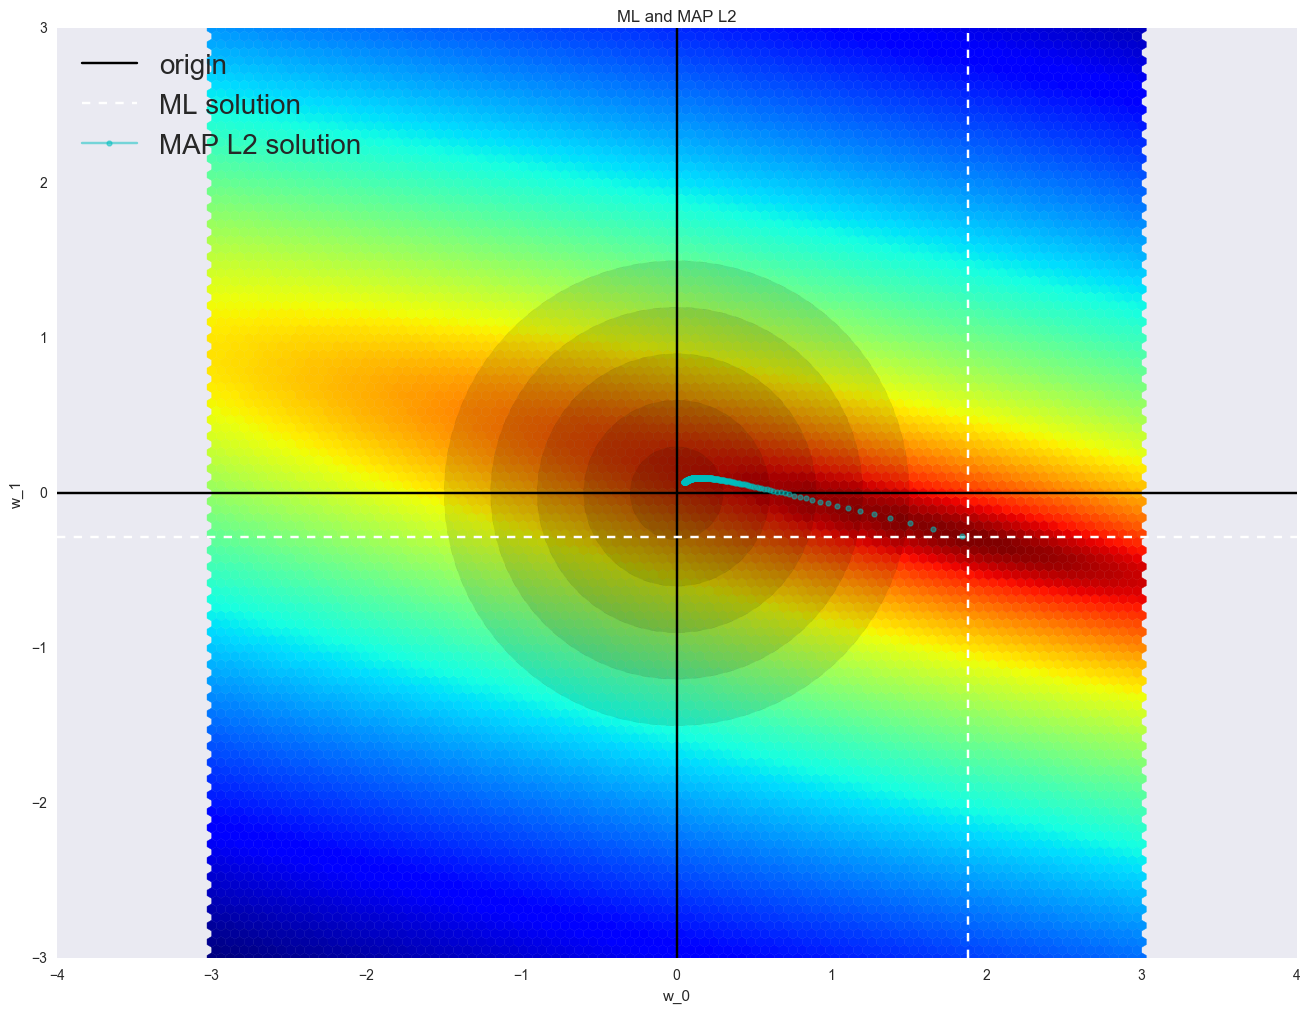

In [40]:
plt.hexbin(w0, w1, C=y**(0.2), cmap=cm.jet_r, bins=None)

plt.axvline(0, color='black', linestyle='-', label='origin')
plt.axhline(0, color='black', linestyle='-')

for i in range(1, 6):
    plt.gcf().gca().add_artist(plt.Circle((0, 0), i*0.3, color='black', linestyle='--', alpha=0.1))

plt.axvline(w[0], color='w', linestyle='--', label='ML solution')
plt.axhline(w[1], color='w', linestyle='--')
    
flag = True
for _, w_l2_solution in w_l2.items():
    plt.plot(w_l2_solution[0], w_l2_solution[1], color='c', marker='.', mew=1, alpha=0.5, 
             label='MAP L2 solution' if flag else None)
    flag = False

plt.axes().set_aspect('equal', 'datalim')
plt.title('ML and MAP L2')
plt.xlabel('w_0')
plt.ylabel('w_1')
plt.legend(loc='upper left', prop={'size': 20})
plt.show()

In [41]:
w_l1 = {}
lmbd_space = np.linspace(0.001, 2, 200)
for lmbd in tqdm(lmbd_space):
    w_l1[lmbd] = fit_lr_l1(X, data['y_train'], lmbd, n_iter=10000, lr=0.001)[0]

100%|██████████| 200/200 [00:28<00:00,  7.01it/s]


In [42]:
w0_support = np.linspace(-3, 3, 1000)
w1_support = np.linspace(-3, 3, 1000)
wx_space = list(it.product(w0_support, w1_support))
w0, w1 = zip(*wx_space)
y = ((data['y_train'][:, np.newaxis] - np.dot(X, np.array(wx_space).T))**2).mean(axis=0)

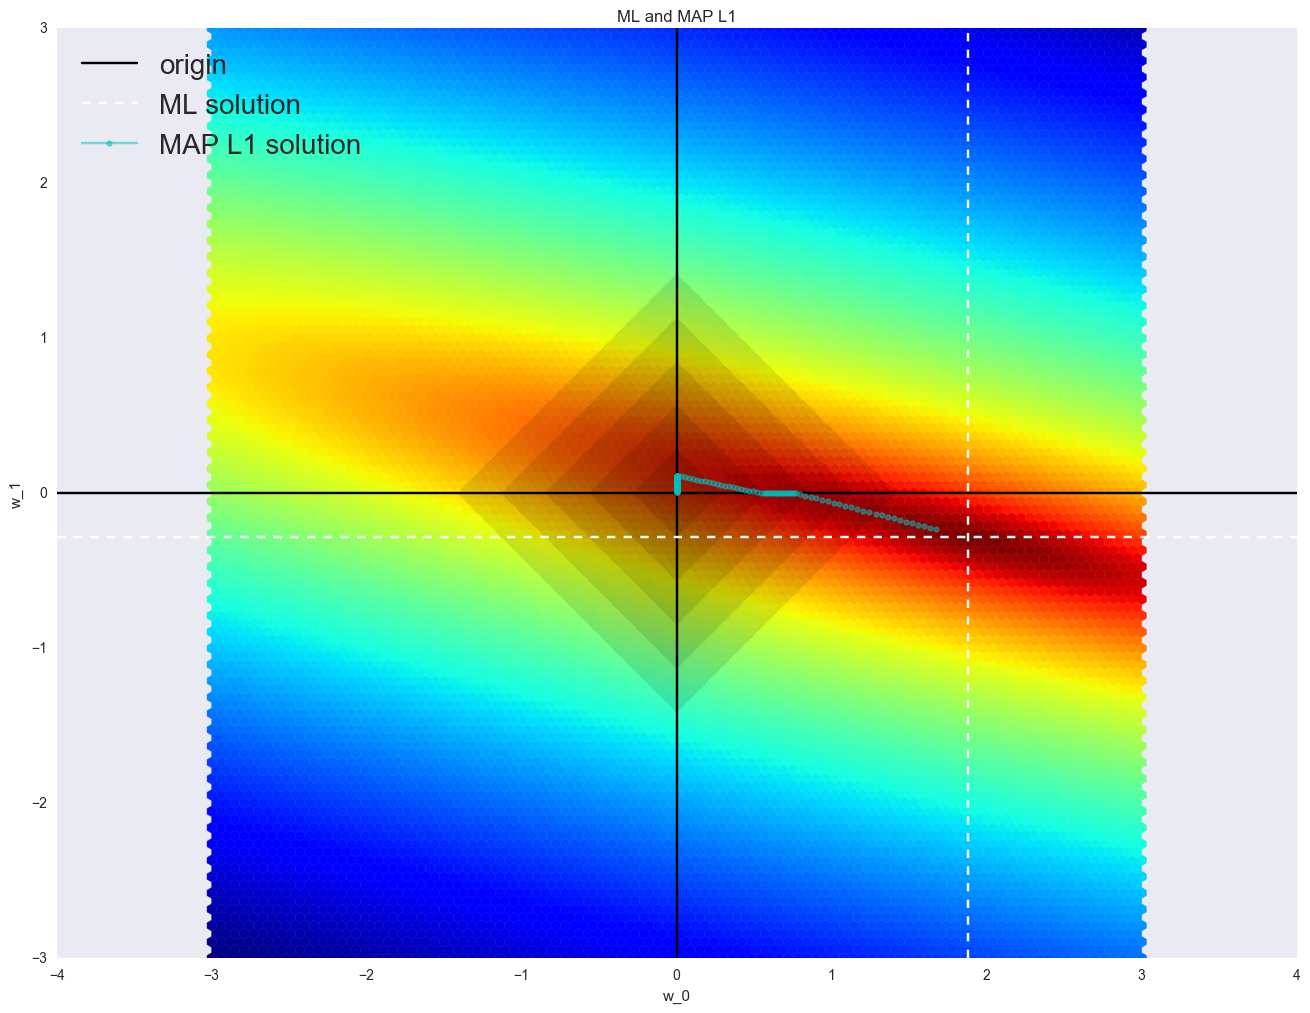

In [43]:
plt.hexbin(w0, w1, C=y**(0.2), cmap=cm.jet_r, bins=None)

plt.axvline(0, color='black', linestyle='-', label='origin')
plt.axhline(0, color='black', linestyle='-')

def plot_rhomb(cx=0, cy=0, r=0.5):
    plt.gcf().gca().add_artist(plt.Rectangle((cx, cy - np.sqrt(2*r**2)), 2*r, 2*r, angle=45, 
                                             color='black', linestyle='--', alpha=0.1))
for i in range(1, 6):
    plot_rhomb(r=0.2*i)

plt.axvline(w[0], color='w', linestyle='--', label='ML solution')
plt.axhline(w[1], color='w', linestyle='--')

flag = True
for _, w_l1_solution in w_l1.items():
    plt.plot(w_l1_solution[0], w_l1_solution[1], color='c', marker='.', mew=1, alpha=0.5, 
             label='MAP L1 solution' if flag else None)
    flag = False

plt.axes().set_aspect('equal', 'datalim')
plt.title('ML and MAP L1')
plt.xlabel('w_0')
plt.ylabel('w_1')
plt.legend(loc='upper left', prop={'size': 20})
plt.show()

In [44]:
boston = sklearn.datasets.load_boston()
print 'Shape of the data:', boston.data.shape
data = {}
data['x_train'] = boston.data
data['y_train'] = boston.target
data['x_train'] = StandardScaler().fit_transform(data['x_train'])

Shape of the data: (506, 13)


In [45]:
lmbd_space = np.linspace(0, 1.5, 50)

res = []
for lmbd in tqdm(lmbd_space):
    res.append(fit_lr_l1(data['x_train'], data['y_train'], lmbd=lmbd, n_iter=10000, lr=0.001)[0])
res = np.array(res)

100%|██████████| 50/50 [00:12<00:00,  4.12it/s]


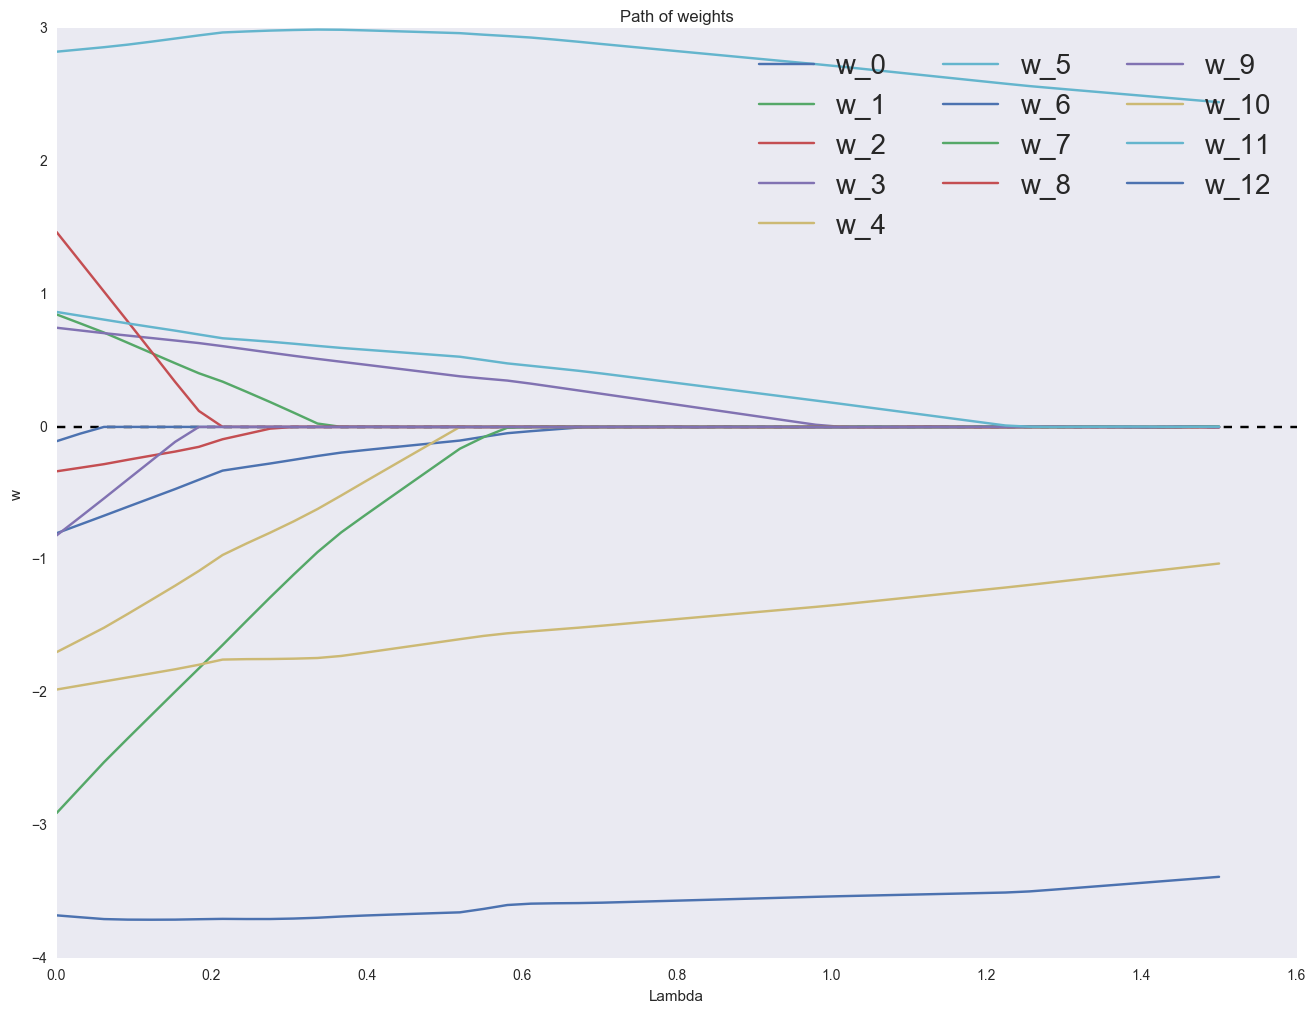

In [46]:
plt.axhline(0, color='black', linestyle='--')

for i in range(res.shape[1]):
    plt.plot(lmbd_space, res[:, i], label='w_%i' % i)
    
plt.title('Path of weights')
plt.xlabel('Lambda')
plt.ylabel('w')
plt.legend(loc='upper right', prop={'size': 20}, ncol=3)
plt.show()